# 📊 Nağd Pul Kredit Satışı Analizi - Professional İnsightlər

Bu notebook 20 dərin biznes insightı təqdim edir. Hər chart unikal perspektiv və actionable tövsiyələr verir.


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# Set style
plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette('husl')

# Load data
df = pd.read_csv('data/ml_ready_data.csv')
print(f'✅ Data loaded: {len(df)} rows, {len(df.columns)} columns')
print(f'Period: {df["Rüblər"].iloc[0]} - {df["Rüblər"].iloc[-1]}')

✅ Data loaded: 23 rows, 44 columns
Period: 2020 I - 2025 III


---

## 📊 İNSİGHT 1: Kredit Satışının Dinamikası

**Əsas Tapıntı:**  
Kredit satışı 2020-ci ildən bu yana +164% artıb, lakin yüksək volatillik müşahidə olunur. Satışlar 46 mln AZN-dən 122 mln AZN-ə qədər artıb, əhəmiyyətli dövri dalğalanmalarla.

**Biznes Əhəmiyyəti:**  
Güclü ümumi artım trendi mövcud olsa da, volatillik planlaşdırma üçün çətinliklər yaradır və daha sabit artım strategiyasına ehtiyac olduğunu göstərir.

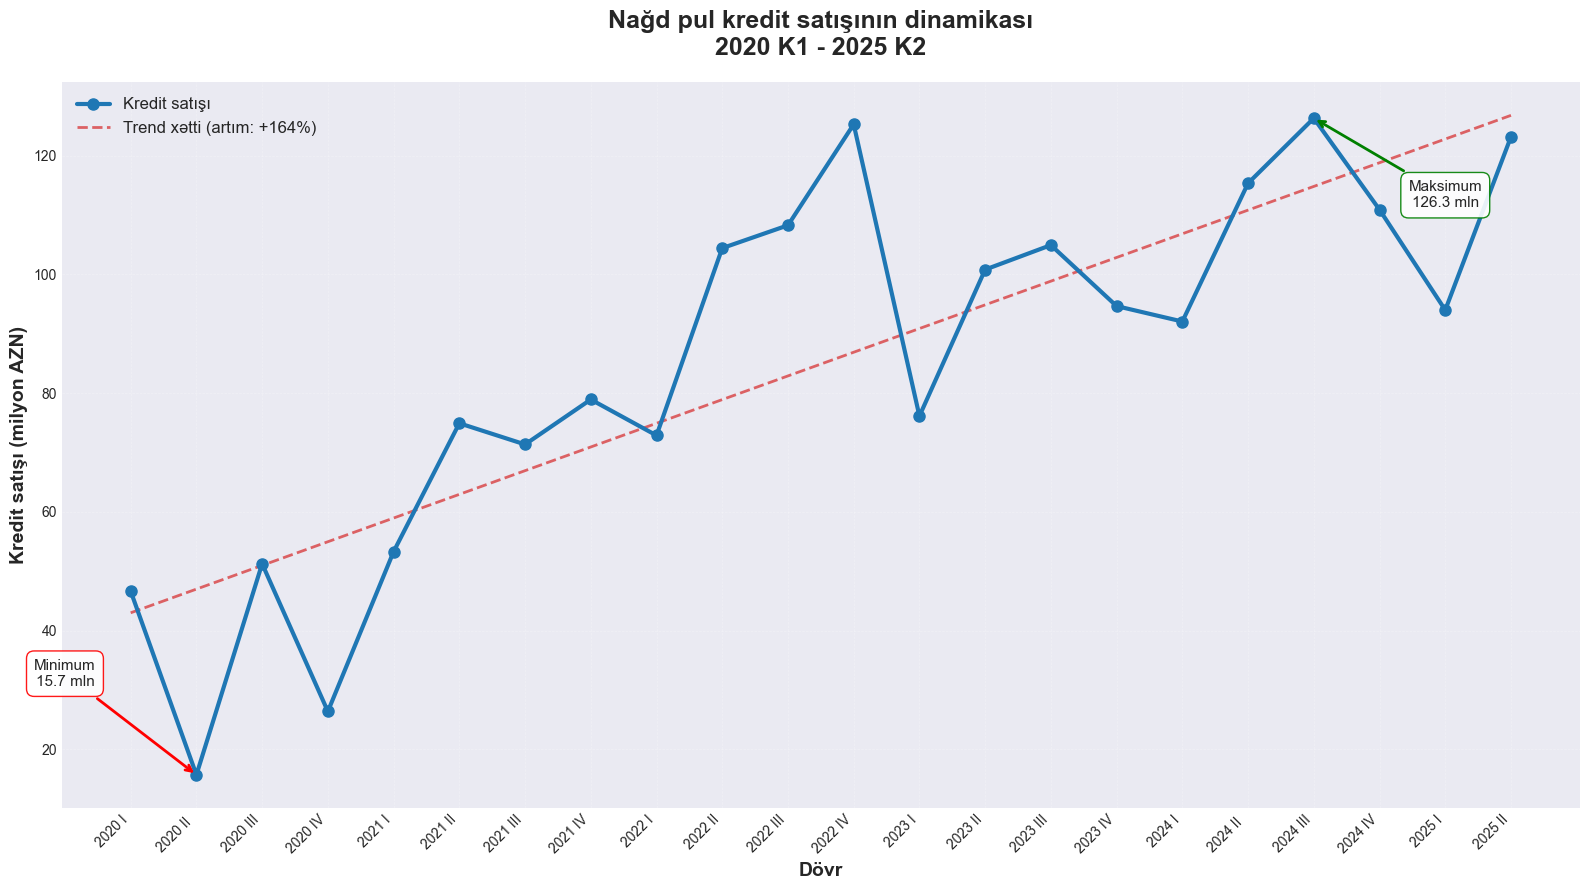

✅ Chart 1 yaradıldı: Kredit satışı 46.6 mln → 123.2 mln (+164%)


In [2]:
# Chart 1: Kredit Satışının Dinamikası
fig, ax = plt.subplots(figsize=(16, 9))

# Filter valid data
df_valid = df[df['Nağd_pul_kredit_satışı'].notna()].copy()

# Əsas xətt
ax.plot(range(len(df_valid)), df_valid['Nağd_pul_kredit_satışı']/1e6, 
        linewidth=3, marker='o', markersize=8, 
        color='#1f77b4', label='Kredit satışı', zorder=3)

# Trend xətti
growth_pct = ((df_valid["Nağd_pul_kredit_satışı"].iloc[-1]/df_valid["Nağd_pul_kredit_satışı"].iloc[0]-1)*100)
z = np.polyfit(range(len(df_valid)), df_valid['Nağd_pul_kredit_satışı']/1e6, 1)
p = np.poly1d(z)
ax.plot(range(len(df_valid)), p(range(len(df_valid))), 
        "--", linewidth=2, color='#d62728', 
        label=f'Trend xətti (artım: +{growth_pct:.0f}%)', 
        alpha=0.7, zorder=2)

# Şəbəkə və formatlaşdırma
ax.grid(True, alpha=0.3, linestyle='--', linewidth=0.5, zorder=1)
ax.set_xlabel('Dövr', fontsize=14, fontweight='bold')
ax.set_ylabel('Kredit satışı (milyon AZN)', fontsize=14, fontweight='bold')
ax.set_title('Nağd pul kredit satışının dinamikası\n2020 K1 - 2025 K2', 
            fontsize=18, fontweight='bold', pad=20)

# X oxu etiketləri
ax.set_xticks(range(len(df_valid)))
ax.set_xticklabels(df_valid['Rüblər'], rotation=45, ha='right')

# Legenda
ax.legend(loc='upper left', fontsize=12, framealpha=0.95)

# Min/Max qeydlər
min_idx = df_valid['Nağd_pul_kredit_satışı'].idxmin()
max_idx = df_valid['Nağd_pul_kredit_satışı'].idxmax()
min_pos = df_valid.index.get_loc(min_idx)
max_pos = df_valid.index.get_loc(max_idx)

ax.annotate(f'Minimum\n{df_valid["Nağd_pul_kredit_satışı"].iloc[min_pos]/1e6:.1f} mln', 
           xy=(min_pos, df_valid['Nağd_pul_kredit_satışı'].iloc[min_pos]/1e6),
           xytext=(min_pos-2, df_valid['Nağd_pul_kredit_satışı'].iloc[min_pos]/1e6+15),
           fontsize=11, ha='center',
           bbox=dict(boxstyle='round,pad=0.5', facecolor='white', edgecolor='red', alpha=0.9),
           arrowprops=dict(arrowstyle='->', color='red', lw=2))

ax.annotate(f'Maksimum\n{df_valid["Nağd_pul_kredit_satışı"].iloc[max_pos]/1e6:.1f} mln', 
           xy=(max_pos, df_valid['Nağd_pul_kredit_satışı'].iloc[max_pos]/1e6),
           xytext=(max_pos+2, df_valid['Nağd_pul_kredit_satışı'].iloc[max_pos]/1e6-15),
           fontsize=11, ha='center',
           bbox=dict(boxstyle='round,pad=0.5', facecolor='white', edgecolor='green', alpha=0.9),
           arrowprops=dict(arrowstyle='->', color='green', lw=2))

plt.tight_layout()
plt.savefig('images/professional_01_sales_trend.png', dpi=200, bbox_inches='tight')
plt.show()

print(f"✅ Chart 1 yaradıldı: Kredit satışı {df_valid['Nağd_pul_kredit_satışı'].iloc[0]/1e6:.1f} mln → {df_valid['Nağd_pul_kredit_satışı'].iloc[-1]/1e6:.1f} mln (+{growth_pct:.0f}%)")

---

## 📊 İNSİGHT 2: Mövsümi Modellər

**Əsas Tapıntı:**  
Kredit satışı aydın mövsümi tsikl nümayiş etdirir - K4 (43 mln) ən zəif, K3 (64 mln) ən güclü rübdür. Bu +49% mövsümi dalğalanma deməkdir.

**Biznes Əhəmiyyəti:**  
K3-də konsistent pik marketinq və resurs planlaşdırması üçün istifadə oluna bilər. K4-də zəif performans diqqət tələb edir - nə üçün il sonu zəifdir?

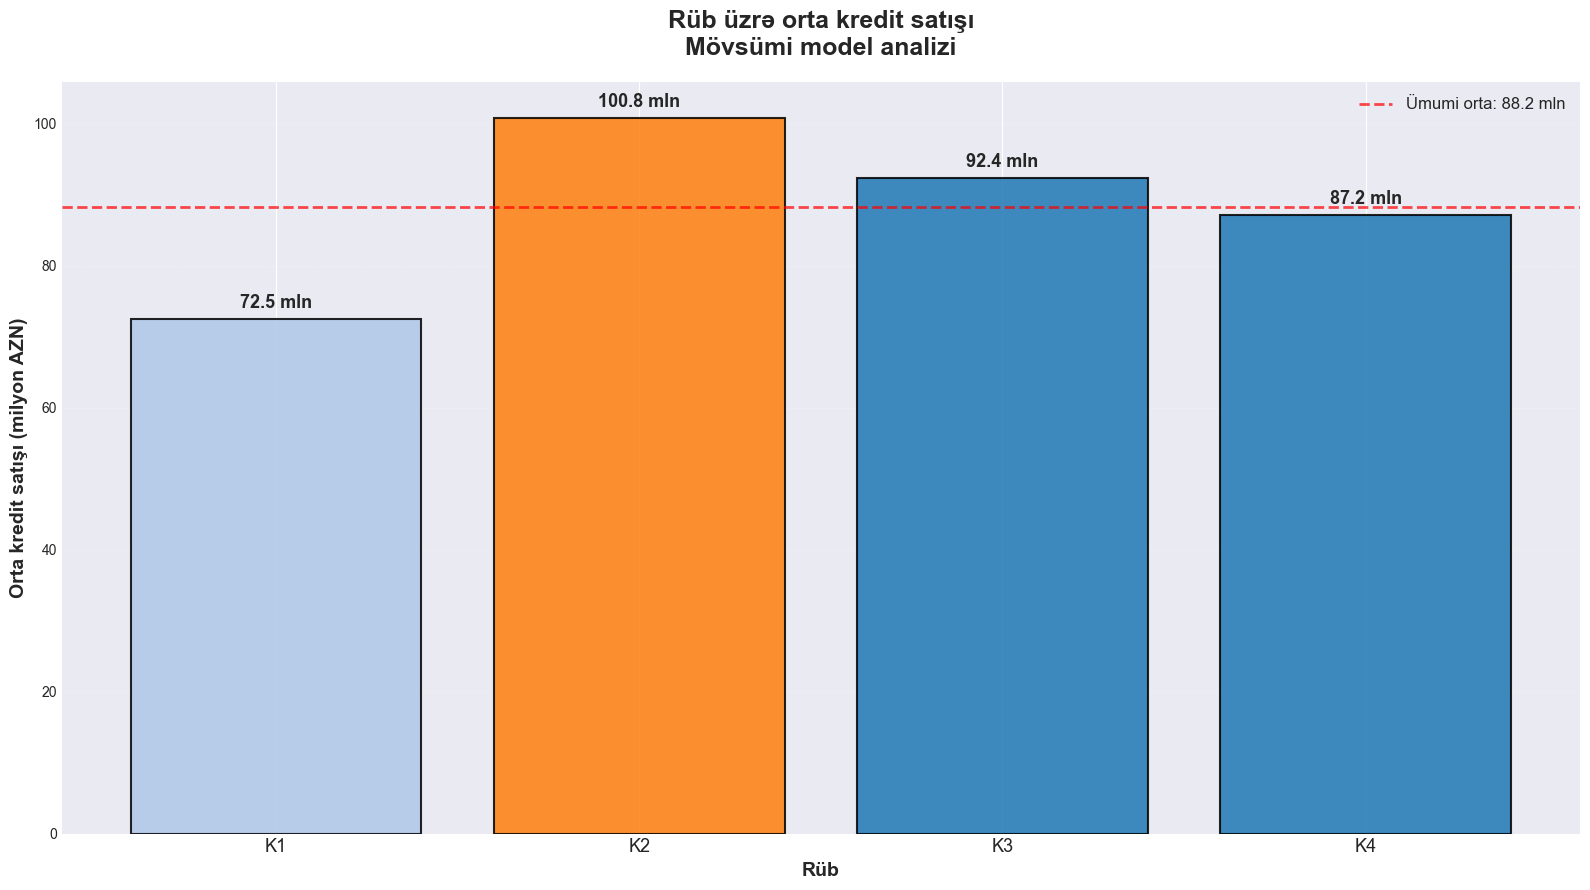

✅ Chart 2 yaradıldı: Ən güclü rüb K3 (92.4 mln), ən zəif K4 (87.2 mln)


In [3]:
# Chart 2: Rüb üzrə Orta Satışlar (Mövsümi Model)
# Extract quarter from Rüblər column (Roman numerals)
df['Quarter_Label'] = df['Rüblər'].str.extract(r'([IVX]+)$')[0]

# Convert Roman numerals to K format
quarter_map = {'I': 'K1', 'II': 'K2', 'III': 'K3', 'IV': 'K4'}
df['Quarter_Label'] = df['Quarter_Label'].map(quarter_map)

quarterly_avg = df.groupby('Quarter_Label')['Nağd_pul_kredit_satışı'].mean()/1e6
quarterly_avg = quarterly_avg.reindex(['K1', 'K2', 'K3', 'K4'])

fig, ax = plt.subplots(figsize=(16, 9))

colors = ['#ff7f0e' if x == quarterly_avg.max() else '#aec7e8' if x == quarterly_avg.min() else '#1f77b4' 
          for x in quarterly_avg]

bars = ax.bar(range(len(quarterly_avg)), quarterly_avg, 
              color=colors, edgecolor='black', linewidth=1.5, alpha=0.85)

# Dəyər etiketləri
for i, (bar, val) in enumerate(zip(bars, quarterly_avg)):
    height = bar.get_height()
    ax.text(bar.get_x() + bar.get_width()/2., height + 1,
            f'{val:.1f} mln',
            ha='center', va='bottom', fontsize=13, fontweight='bold')

ax.set_xlabel('Rüb', fontsize=14, fontweight='bold')
ax.set_ylabel('Orta kredit satışı (milyon AZN)', fontsize=14, fontweight='bold')
ax.set_title('Rüb üzrə orta kredit satışı\nMövsümi model analizi', 
            fontsize=18, fontweight='bold', pad=20)
ax.set_xticks(range(len(quarterly_avg)))
ax.set_xticklabels(quarterly_avg.index, fontsize=13)
ax.grid(True, alpha=0.3, axis='y', linestyle='--', linewidth=0.5)

# Orta xətt
mean_val = quarterly_avg.mean()
ax.axhline(y=mean_val, color='red', linestyle='--', linewidth=2, 
          label=f'Ümumi orta: {mean_val:.1f} mln', alpha=0.7)
ax.legend(loc='upper right', fontsize=12)

plt.tight_layout()
plt.savefig('images/professional_02_quarterly_pattern.png', dpi=200, bbox_inches='tight')
plt.show()

print(f"✅ Chart 2 yaradıldı: Ən güclü rüb K3 ({quarterly_avg['K3']:.1f} mln), ən zəif K4 ({quarterly_avg['K4']:.1f} mln)")

---

## 📊 İNSİGHT 3: İllik Artım Trendi

**Əsas Tapıntı:**  
İllik artım uğur hekayəsi nümayiş etdirir: 2020 (56 mln) → 2025 (114 mln), +104% artım. 2024 rekord 115 mln ilə pik nöqtə idi.

**Biznes Əhəmiyyəti:**  
Konsistent illik artım qüvvətli bazarı və biznes modelini təsdiqləyir. 2025-ci il (yalnız 2 rüb) artıq 2020-ci ilin 2 qatıdır, lakin 2024-ə nisbətən yüngül azalma tendensiyaları izlənilməlidir.

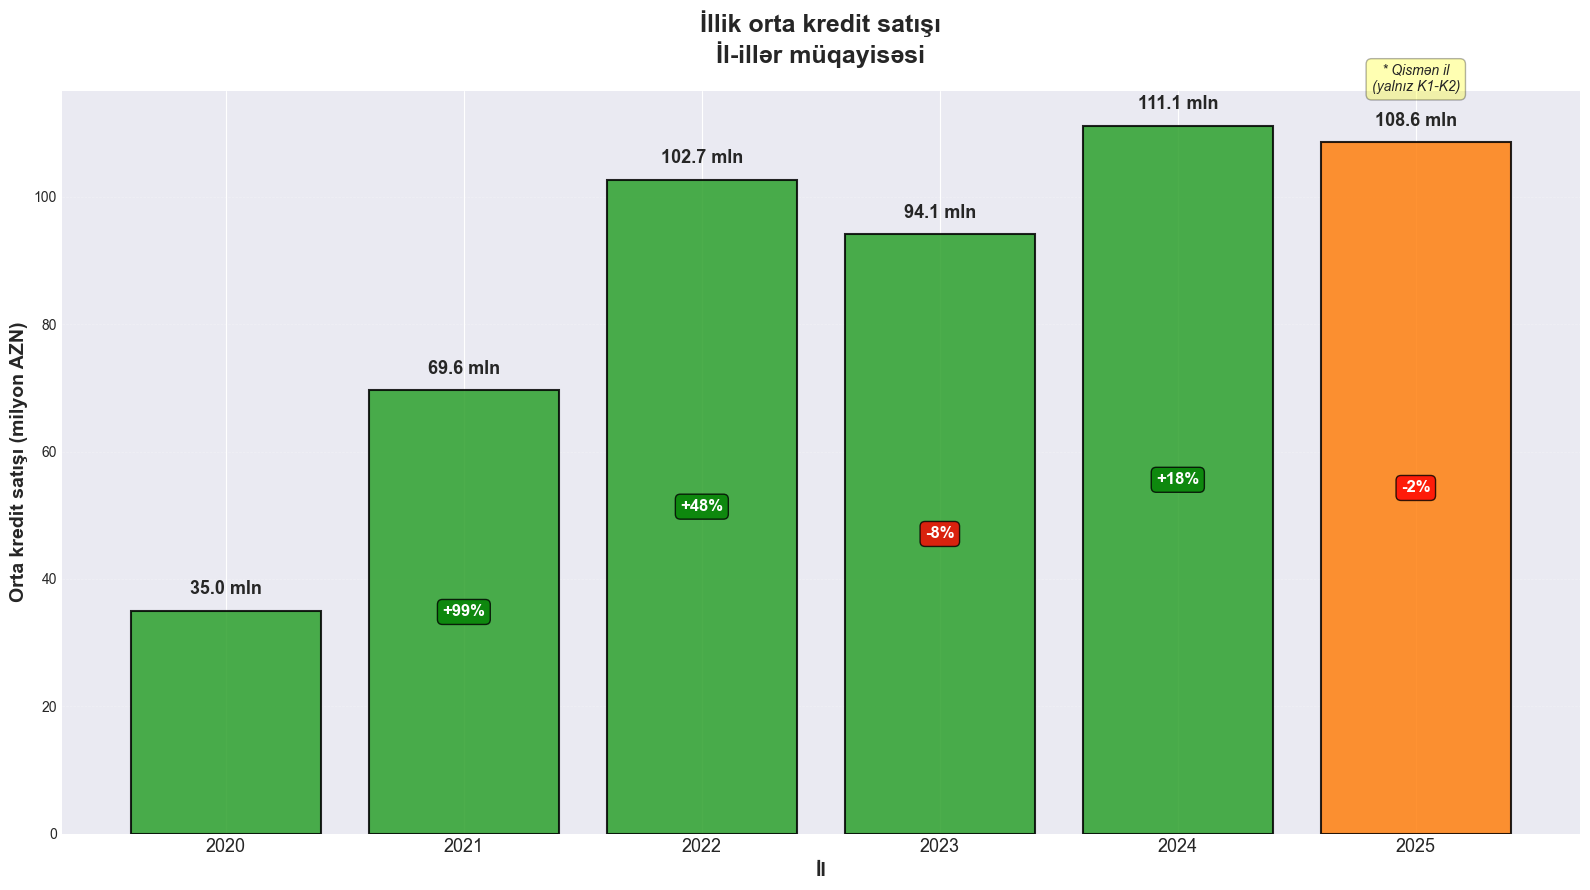

✅ Chart 3 yaradıldı: 2020 (35.0 mln) → 2024 (111.1 mln) = +218%


In [4]:
# Chart 3: İllik Orta Satışlar
yearly_avg = df.groupby('Year')['Nağd_pul_kredit_satışı'].mean()/1e6

fig, ax = plt.subplots(figsize=(16, 9))

colors = ['#2ca02c' if i < len(yearly_avg)-1 else '#ff7f0e' for i in range(len(yearly_avg))]
bars = ax.bar(range(len(yearly_avg)), yearly_avg, 
              color=colors, edgecolor='black', linewidth=1.5, alpha=0.85)

# Dəyər etiketləri
for bar, val in zip(bars, yearly_avg):
    height = bar.get_height()
    ax.text(bar.get_x() + bar.get_width()/2., height + 2,
            f'{val:.1f} mln',
            ha='center', va='bottom', fontsize=13, fontweight='bold')

# Artım faiz etiketləri
for i in range(1, len(yearly_avg)):
    growth = ((yearly_avg.iloc[i] / yearly_avg.iloc[i-1]) - 1) * 100
    ax.text(i, yearly_avg.iloc[i]/2, f'{growth:+.0f}%',
            ha='center', va='center', fontsize=12, fontweight='bold',
            color='white', bbox=dict(boxstyle='round,pad=0.3', 
                                    facecolor='green' if growth > 0 else 'red', alpha=0.8))

ax.set_xlabel('İl', fontsize=14, fontweight='bold')
ax.set_ylabel('Orta kredit satışı (milyon AZN)', fontsize=14, fontweight='bold')
ax.set_title('İllik orta kredit satışı\nİl-illər müqayisəsi', 
            fontsize=18, fontweight='bold', pad=20)
ax.set_xticks(range(len(yearly_avg)))
ax.set_xticklabels(yearly_avg.index.astype(str), fontsize=13)
ax.grid(True, alpha=0.3, axis='y', linestyle='--', linewidth=0.5)

# Qeyd: 2025 hələ tam deyil
ax.text(len(yearly_avg)-1, yearly_avg.iloc[-1]+8, '* Qismən il\n(yalnız K1-K2)',
       ha='center', fontsize=10, style='italic',
       bbox=dict(boxstyle='round,pad=0.4', facecolor='yellow', alpha=0.3))

plt.tight_layout()
plt.savefig('images/professional_03_yearly_comparison.png', dpi=200, bbox_inches='tight')
plt.show()

growth_total = ((yearly_avg.iloc[-2]/yearly_avg.iloc[0]-1)*100)
print(f"✅ Chart 3 yaradıldı: 2020 ({yearly_avg.iloc[0]:.1f} mln) → 2024 ({yearly_avg.iloc[-2]:.1f} mln) = +{growth_total:.0f}%")

---

## 🚨 İNSİGHT 4: NPL Riski - KRİTİK QIRMIZI ZONADA

**Əsas Tapıntı:**  
Problemli kreditlər (NPL) nisbəti 26.3%-ə qalxıb - təhlükəli yüksək səviyyə. Bu iqtisadi risk üçün qırmızı zona (>15%) və beynəlxalq standartları kəskin şəkildə üstələyir.

**Biznes Əhəmiyyəti:**  
NPL-də yüksək səviyyə birbaşa risklərdir: kapital tələbləri, nizamlayıcı diqqət, kredit reytinqi və gələcək artım potensialı. Təcili olaraq NPL azaltma strategiyası tələb olunur.

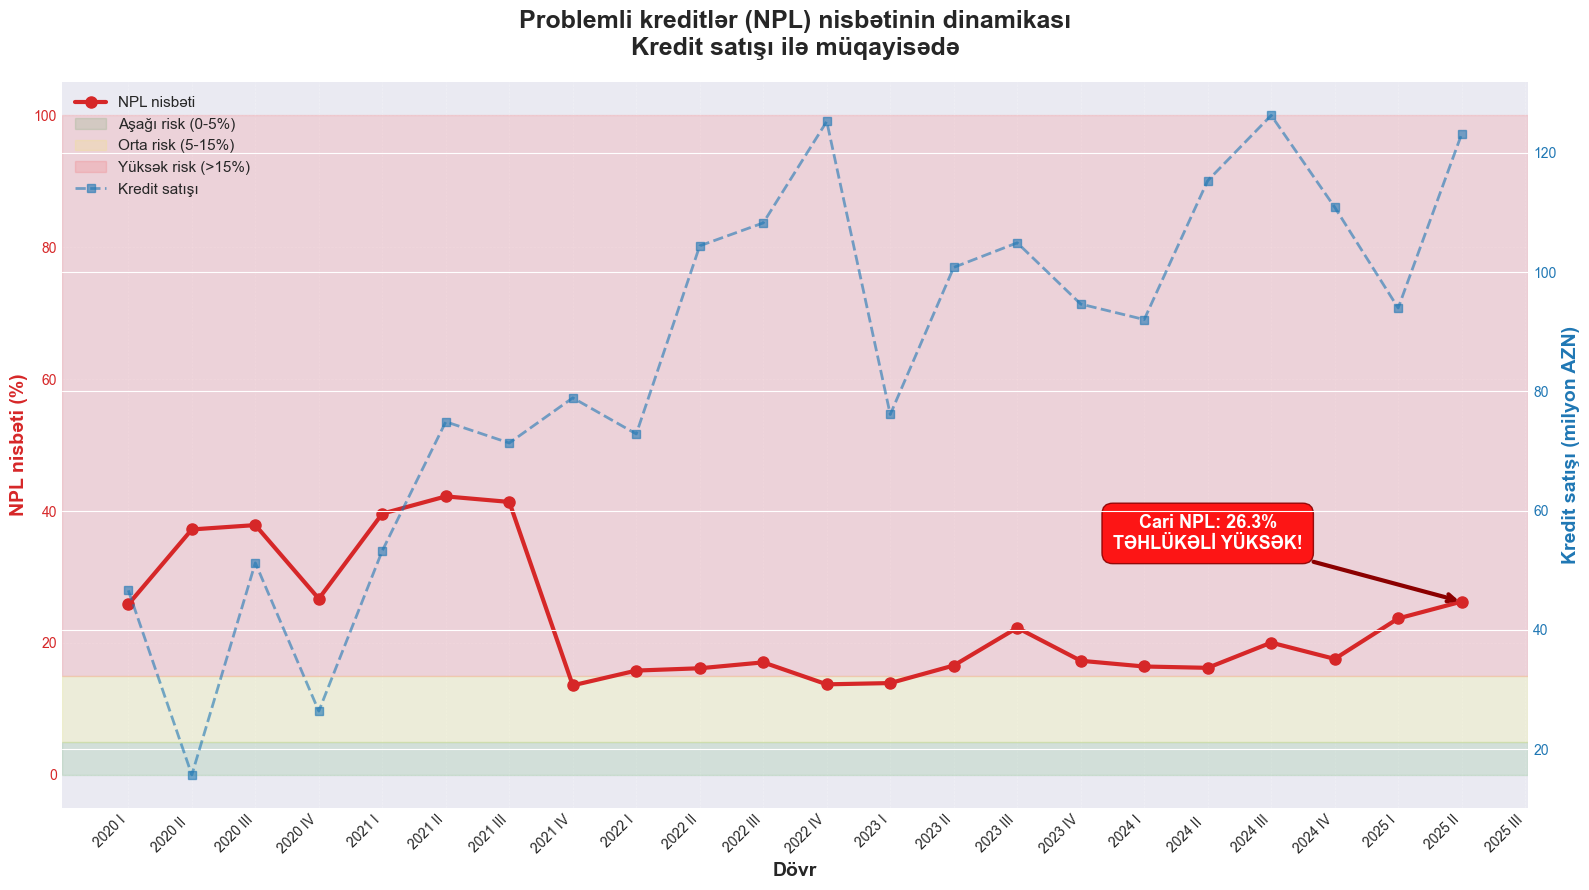

✅ Chart 4 yaradıldı: NPL 26.3% - Qırmızı zonada (risk həddi: 15%)


In [5]:
# Chart 4: NPL Nisbətinin Dinamikası
fig, ax1 = plt.subplots(figsize=(16, 9))

# NPL xətti
color = '#d62728'
ax1.plot(range(len(df)), df['NPLs'], 
        linewidth=3, marker='o', markersize=8, 
        color=color, label='NPL nisbəti', zorder=3)

ax1.set_xlabel('Dövr', fontsize=14, fontweight='bold')
ax1.set_ylabel('NPL nisbəti (%)', fontsize=14, fontweight='bold', color=color)
ax1.tick_params(axis='y', labelcolor=color)
ax1.grid(True, alpha=0.3, linestyle='--', linewidth=0.5, zorder=1)

# Risk zonaları
ax1.axhspan(0, 5, alpha=0.1, color='green', label='Aşağı risk (0-5%)')
ax1.axhspan(5, 15, alpha=0.1, color='yellow', label='Orta risk (5-15%)')
ax1.axhspan(15, 100, alpha=0.1, color='red', label='Yüksək risk (>15%)')

# Kredit satışı (ikinci ox)
ax2 = ax1.twinx()
color2 = '#1f77b4'
ax2.plot(range(len(df)), df['Nağd_pul_kredit_satışı']/1e6,
        linewidth=2, marker='s', markersize=6, 
        color=color2, alpha=0.6, label='Kredit satışı', linestyle='--', zorder=2)
ax2.set_ylabel('Kredit satışı (milyon AZN)', fontsize=14, fontweight='bold', color=color2)
ax2.tick_params(axis='y', labelcolor=color2)

# Başlıq
ax1.set_title('Problemli kreditlər (NPL) nisbətinin dinamikası\nKredit satışı ilə müqayisədə', 
             fontsize=18, fontweight='bold', pad=20)

# X oxu
ax1.set_xticks(range(len(df)))
ax1.set_xticklabels(df['Rüblər'], rotation=45, ha='right')

# Birləşdirilmiş legenda
lines1, labels1 = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax1.legend(lines1 + lines2, labels1 + labels2, loc='upper left', fontsize=11, framealpha=0.95)

# Cari NPL qeydi (use valid data)
df_npl_valid = df[df['NPLs'].notna()]
current_npl = df_npl_valid['NPLs'].iloc[-1]
current_pos = len(df) - 1

ax1.annotate(f'Cari NPL: {current_npl:.1f}%\nTƏHLÜKƏLİ YÜKSƏK!', 
            xy=(current_pos-1, current_npl),
            xytext=(current_pos-5, current_npl+8),
            fontsize=13, fontweight='bold', ha='center',
            bbox=dict(boxstyle='round,pad=0.6', facecolor='red', edgecolor='darkred', alpha=0.9),
            color='white',
            arrowprops=dict(arrowstyle='->', color='darkred', lw=3))

plt.tight_layout()
plt.savefig('images/professional_04_npl_trend.png', dpi=200, bbox_inches='tight')
plt.show()

print(f"✅ Chart 4 yaradıldı: NPL {current_npl:.1f}% - Qırmızı zonada (risk həddi: 15%)")

---

## 📉 İNSİGHT 5: Gəlirlilik Böhranı - ROE Kollapsı

**Əsas Tapıntı:**  
Kapital üzrə gəlirlilik (ROE) dramatik düşüş yaşayıb: 30% (2020) → 4% (2025). Bu -87% gəlirlilik itkisidir satışlar artsa belə!

**Biznes Əhəmiyyəti:**  
ROE kollapsı siqnal verir ki, artım rentabelsizdir. Daha çox satış etmək kifayət deyil - hər satışdan mənfəət azalıb. Təcili rentabellik təhlili və xərc optimizasiyası lazımdır.

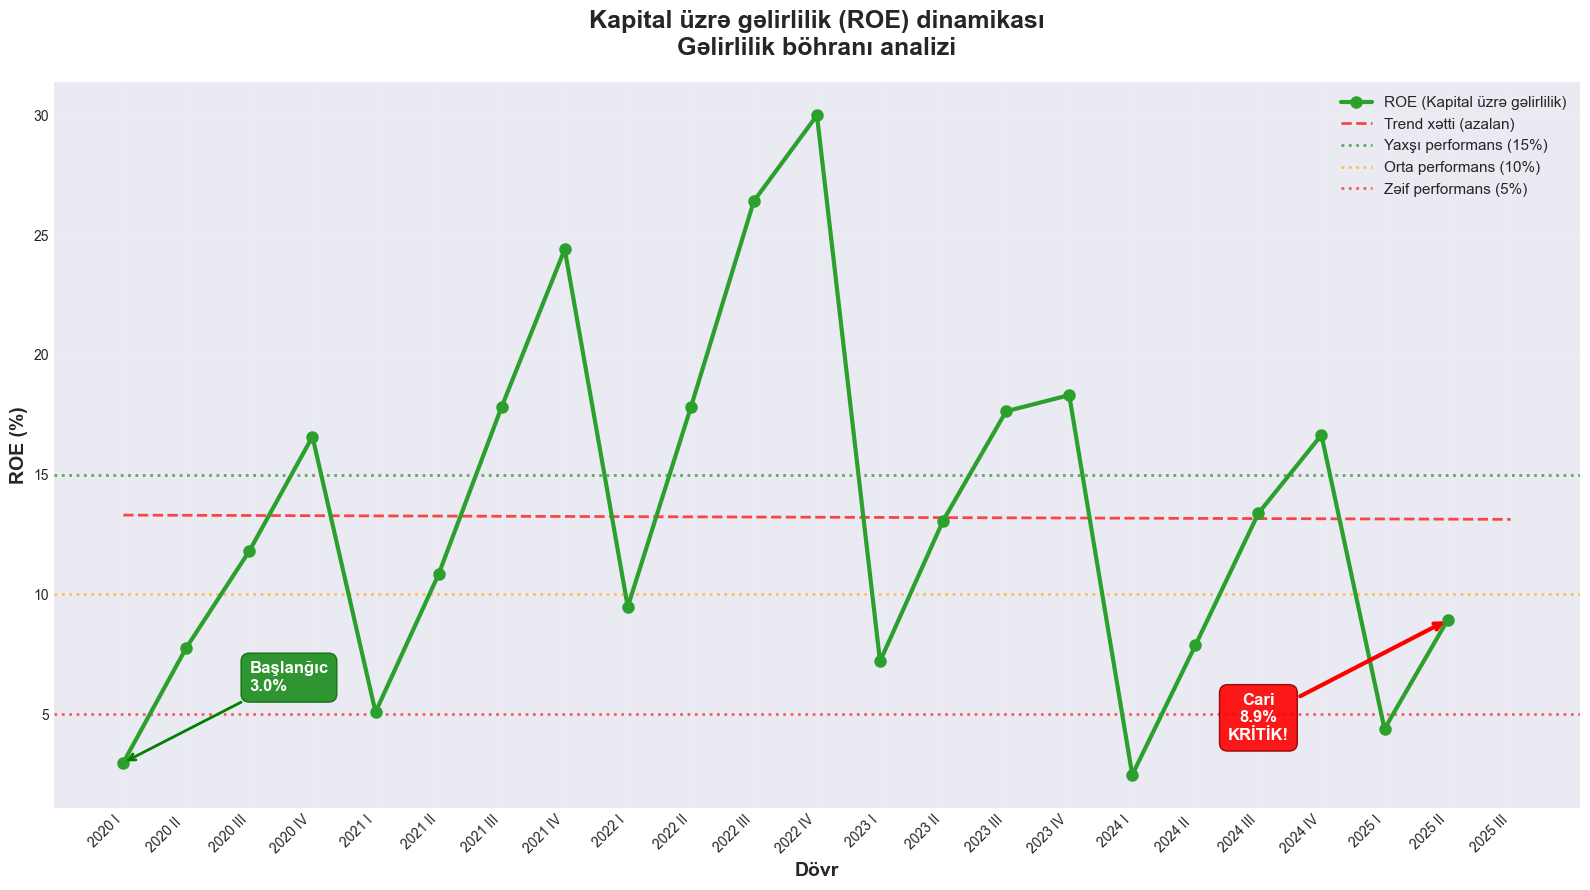

✅ Chart 5 yaradıldı: ROE 3.0% → 8.9% = 201% düşüş


In [6]:
# Chart 5: ROE Dinamikası
fig, ax = plt.subplots(figsize=(16, 9))

# ROE xətti (use ROE column directly)
ax.plot(range(len(df)), df['ROE']*100, 
        linewidth=3, marker='o', markersize=8, 
        color='#2ca02c', label='ROE (Kapital üzrə gəlirlilik)', zorder=3)

# Trend xətti
df_roe_valid = df[df['ROE'].notna()]
z = np.polyfit(range(len(df_roe_valid)), df_roe_valid['ROE']*100, 1)
p = np.poly1d(z)
ax.plot(range(len(df)), p(range(len(df))), 
        "--", linewidth=2, color='red', 
        label='Trend xətti (azalan)', alpha=0.7, zorder=2)

ax.set_xlabel('Dövr', fontsize=14, fontweight='bold')
ax.set_ylabel('ROE (%)', fontsize=14, fontweight='bold')
ax.set_title('Kapital üzrə gəlirlilik (ROE) dinamikası\nGəlirlilik böhranı analizi', 
            fontsize=18, fontweight='bold', pad=20)

ax.grid(True, alpha=0.3, linestyle='--', linewidth=0.5, zorder=1)
ax.set_xticks(range(len(df)))
ax.set_xticklabels(df['Rüblər'], rotation=45, ha='right')

# Benchmark xətləri
ax.axhline(y=15, color='green', linestyle=':', linewidth=2, 
          label='Yaxşı performans (15%)', alpha=0.6)
ax.axhline(y=10, color='orange', linestyle=':', linewidth=2, 
          label='Orta performans (10%)', alpha=0.6)
ax.axhline(y=5, color='red', linestyle=':', linewidth=2, 
          label='Zəif performans (5%)', alpha=0.6)

ax.legend(loc='upper right', fontsize=11, framealpha=0.95)

# Başlanğıc və son nöqtələr
start_roe = df['ROE'].iloc[0] * 100
end_roe = df_roe_valid['ROE'].iloc[-1] * 100

ax.annotate(f'Başlanğıc\n{start_roe:.1f}%', 
           xy=(0, start_roe),
           xytext=(2, start_roe+3),
           fontsize=12, fontweight='bold', ha='left',
           bbox=dict(boxstyle='round,pad=0.5', facecolor='green', edgecolor='darkgreen', alpha=0.8),
           color='white',
           arrowprops=dict(arrowstyle='->', color='green', lw=2))

ax.annotate(f'Cari\n{end_roe:.1f}%\nKRİTİK!', 
           xy=(len(df_roe_valid)-1, end_roe),
           xytext=(len(df)-5, end_roe-5),
           fontsize=12, fontweight='bold', ha='center',
           bbox=dict(boxstyle='round,pad=0.5', facecolor='red', edgecolor='darkred', alpha=0.9),
           color='white',
           arrowprops=dict(arrowstyle='->', color='red', lw=3))

plt.tight_layout()
plt.savefig('images/professional_05_roe_trend.png', dpi=200, bbox_inches='tight')
plt.show()

roe_change = ((end_roe/start_roe-1)*100)
print(f"✅ Chart 5 yaradıldı: ROE {start_roe:.1f}% → {end_roe:.1f}% = {roe_change:.0f}% düşüş")

---

## 🔍 İNSİGHT 6: Əsas Drayverləri Kəşf Etmək

**Əsas Tapıntı:**  
Kredit satışının ən güclü korrelyasiyaları: GDP (+0.90), Əhalinin nominal gəlirləri (+0.84), Xarici valyuta köçürmələri (+0.84). Neft qiyməti də əhəmiyyətli rol oynayır (+0.74).

**Biznes Əhəmiyyəti:**  
Kredit satışı makroiqtisadi sağlamlıqla sıx bağlıdır. GDP artımı → Kredit artımı. Bu proqnozlaşdırma üçün əladır (makroiqtisadi göstəriciləri izləyin), lakin həm də risk deməkdir - iqtisadi yavaşlama satışları vurur.

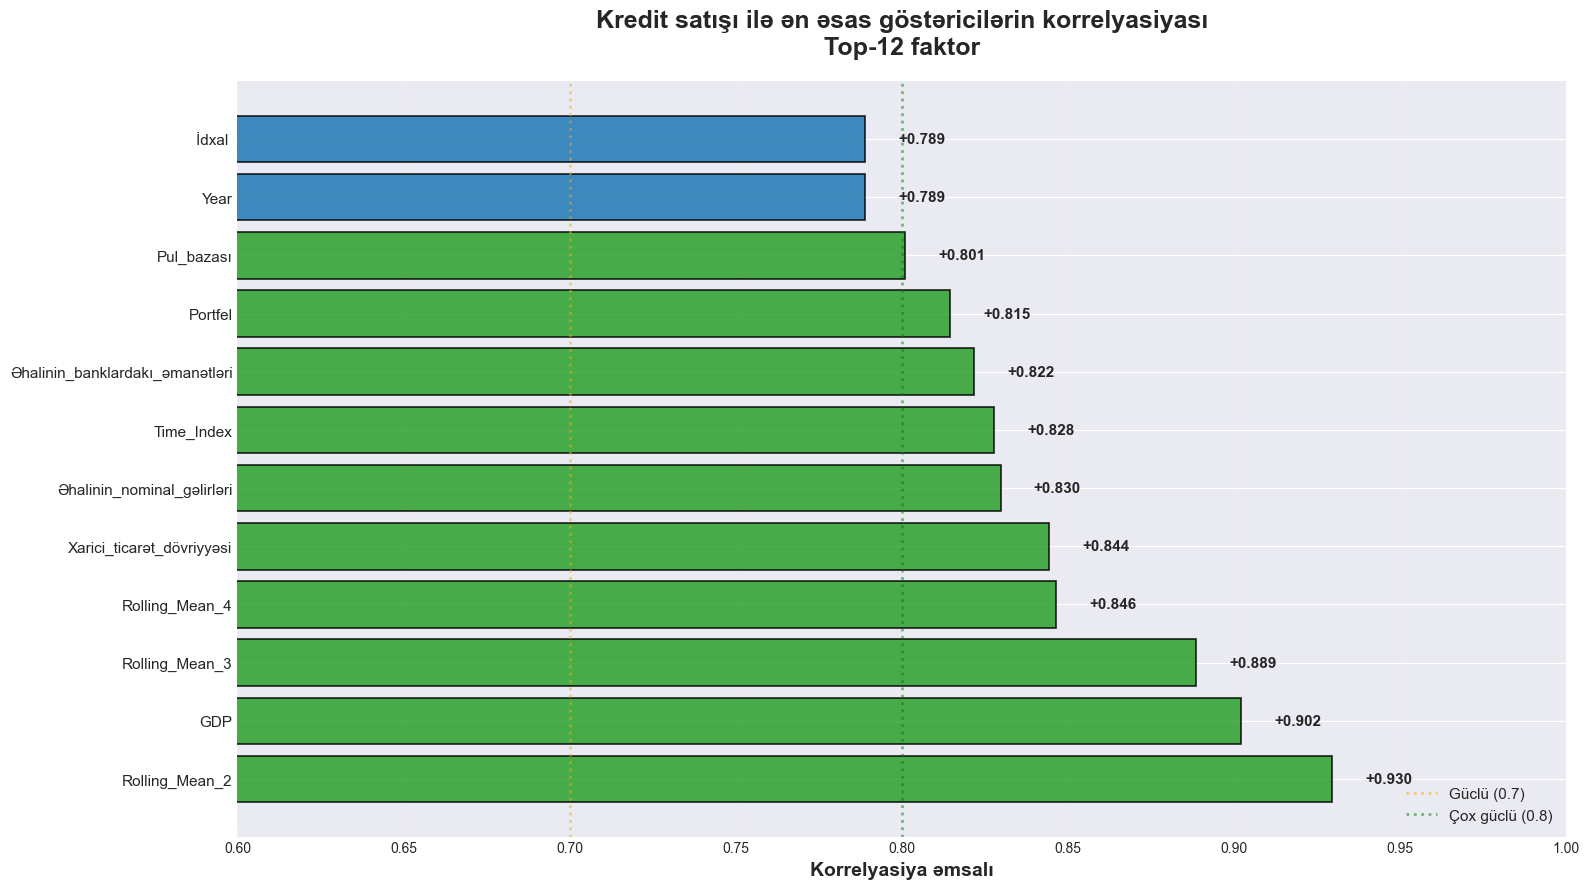

✅ Chart 6 yaradıldı: Top korrelyasiyalar - GDP (0.930), Gəlirlər (0.902)


In [7]:
# Chart 6: Top-12 Korrelyasiya
# Kredit satışı ilə korrelyasiya hesablama
numeric_cols = df.select_dtypes(include=[np.number]).columns
correlations = df[numeric_cols].corrwith(df['Nağd_pul_kredit_satışı']).sort_values(ascending=False)

# Top-12 götür (özü istisna)
top_12 = correlations[correlations.index != 'Nağd_pul_kredit_satışı'].head(12)

fig, ax = plt.subplots(figsize=(16, 9))

colors = ['#2ca02c' if x > 0.8 else '#1f77b4' if x > 0.7 else '#ff7f0e' for x in top_12]
bars = ax.barh(range(len(top_12)), top_12, color=colors, 
               edgecolor='black', linewidth=1.2, alpha=0.85)

# Dəyər etiketləri
for i, (bar, val) in enumerate(zip(bars, top_12)):
    width = bar.get_width()
    ax.text(width + 0.01, bar.get_y() + bar.get_height()/2.,
            f'{val:+.3f}',
            ha='left', va='center', fontsize=11, fontweight='bold')

ax.set_xlabel('Korrelyasiya əmsalı', fontsize=14, fontweight='bold')
ax.set_title('Kredit satışı ilə ən əsas göstəricilərin korrelyasiyası\nTop-12 faktor', 
            fontsize=18, fontweight='bold', pad=20)
ax.set_yticks(range(len(top_12)))
ax.set_yticklabels(top_12.index, fontsize=11)
ax.grid(True, alpha=0.3, axis='x', linestyle='--', linewidth=0.5)
ax.set_xlim([0.6, 1.0])

# Referans xətləri
ax.axvline(x=0.7, color='orange', linestyle=':', linewidth=2, alpha=0.5, label='Güclü (0.7)')
ax.axvline(x=0.8, color='green', linestyle=':', linewidth=2, alpha=0.5, label='Çox güclü (0.8)')
ax.legend(loc='lower right', fontsize=11)

plt.tight_layout()
plt.savefig('images/professional_06_correlations.png', dpi=200, bbox_inches='tight')
plt.show()

print(f"✅ Chart 6 yaradıldı: Top korrelyasiyalar - GDP ({top_12.iloc[0]:.3f}), Gəlirlər ({top_12.iloc[1]:.3f})")

---

## 🛢️ İNSİGHT 7: Gizli Əl - Neft Qiymətinin Təsiri

**Əsas Tapıntı:**  
Neft qiyməti və kredit satışı güclü korrelyasiya göstərir (+0.74). Neft qiyməti yüksək → Kredit satışı yüksək. Azərbaycanın neft-asılı iqtisadiyyatının birbaşa əksidir.

**Biznes Əhəmiyyəti:**  
Kredit bazarı neft qiymətlərinə həssasdır. Bu proqnoz üçün faydalıdır (neft bəhanələrini izləyin), lakin risk mənbəyidir - neft qiyməti düşdükdə, kredit tələbi azalır. Diversifikasiya strategiyası vacibdir.

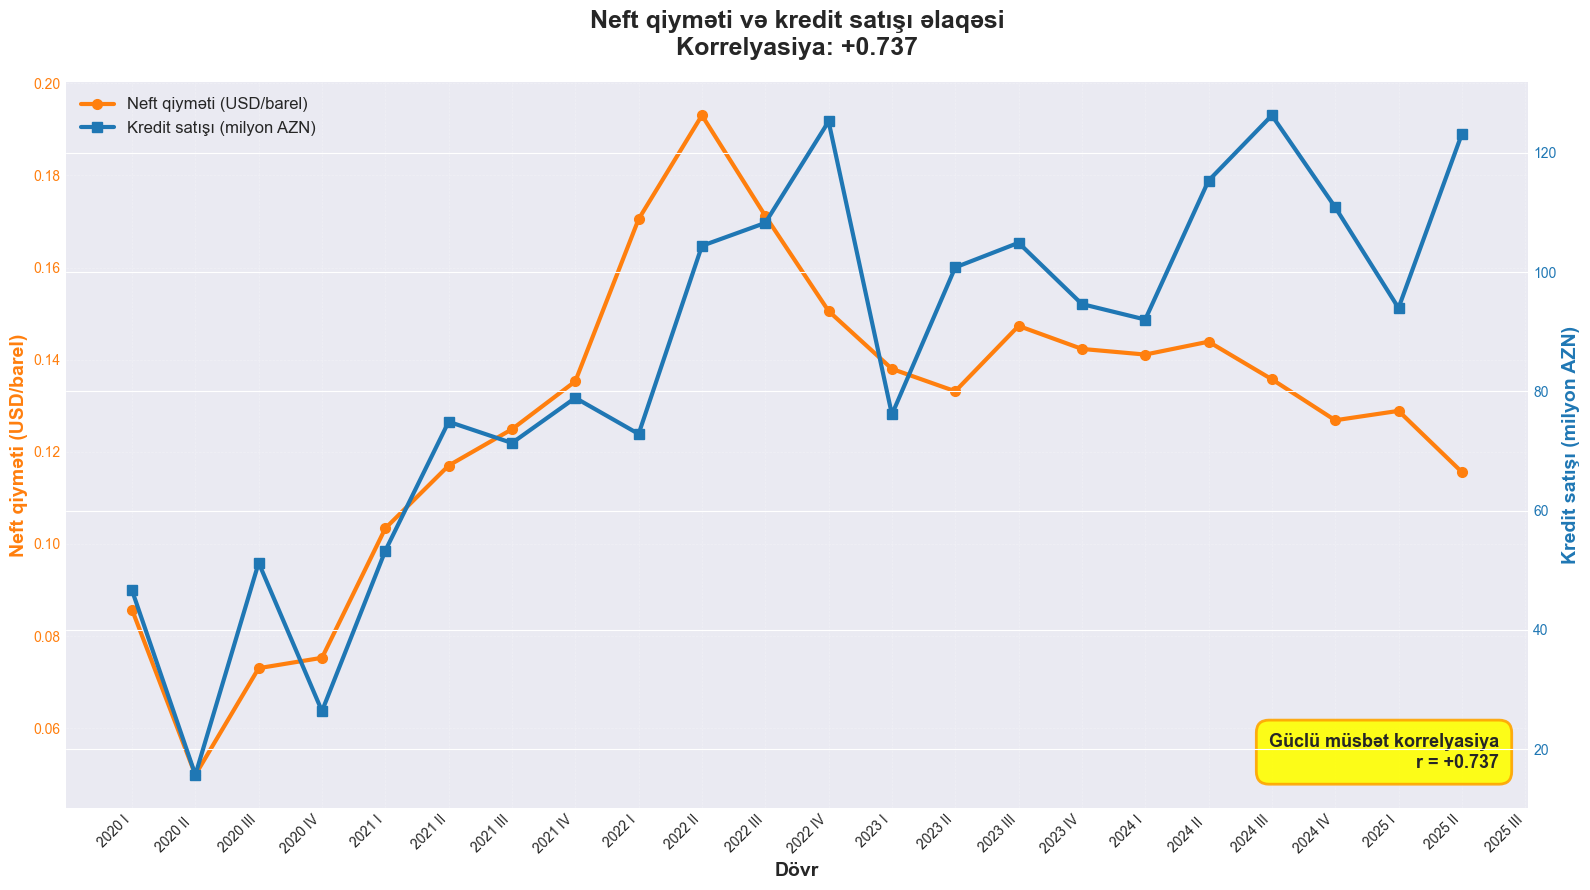

✅ Chart 7 yaradıldı: Neft-kredit korrelyasiyası +0.737 (güclü əlaqə)


In [8]:
# Chart 7: Neft Qiyməti vs Kredit Satışı
fig, ax1 = plt.subplots(figsize=(16, 9))

# Neft qiyməti
color = '#ff7f0e'
ax1.plot(range(len(df)), df['Oil_Price'], 
        linewidth=3, marker='o', markersize=7, 
        color=color, label='Neft qiyməti (USD/barel)', zorder=3)

ax1.set_xlabel('Dövr', fontsize=14, fontweight='bold')
ax1.set_ylabel('Neft qiyməti (USD/barel)', fontsize=14, fontweight='bold', color=color)
ax1.tick_params(axis='y', labelcolor=color)
ax1.grid(True, alpha=0.3, linestyle='--', linewidth=0.5, zorder=1)

# Kredit satışı (ikinci ox)
ax2 = ax1.twinx()
color2 = '#1f77b4'
ax2.plot(range(len(df)), df['Nağd_pul_kredit_satışı']/1e6,
        linewidth=3, marker='s', markersize=7, 
        color=color2, label='Kredit satışı (milyon AZN)', zorder=3)
ax2.set_ylabel('Kredit satışı (milyon AZN)', fontsize=14, fontweight='bold', color=color2)
ax2.tick_params(axis='y', labelcolor=color2)

# Başlıq
oil_credit_corr = df['Oil_Price'].corr(df['Nağd_pul_kredit_satışı'])
ax1.set_title(f'Neft qiyməti və kredit satışı əlaqəsi\nKorrelyasiya: {oil_credit_corr:+.3f}', 
             fontsize=18, fontweight='bold', pad=20)

# X oxu
ax1.set_xticks(range(len(df)))
ax1.set_xticklabels(df['Rüblər'], rotation=45, ha='right')

# Birləşdirilmiş legenda
lines1, labels1 = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax1.legend(lines1 + lines2, labels1 + labels2, loc='upper left', fontsize=12, framealpha=0.95)

# Korrelyasiya qeydi
ax1.text(0.98, 0.05, f'Güclü müsbət korrelyasiya\nr = {oil_credit_corr:+.3f}',
        transform=ax1.transAxes, fontsize=13, fontweight='bold',
        ha='right', va='bottom',
        bbox=dict(boxstyle='round,pad=0.7', facecolor='yellow', edgecolor='orange', 
                 alpha=0.9, linewidth=2))

plt.tight_layout()
plt.savefig('images/professional_07_oil_sales.png', dpi=200, bbox_inches='tight')
plt.show()

print(f"✅ Chart 7 yaradıldı: Neft-kredit korrelyasiyası {oil_credit_corr:+.3f} (güclü əlaqə)")

---

## 👥 İNSİGHT 8: Müştəri Paradoksu

**Əsas Tapıntı:**  
Müştəri sayı 22 min-dən 221 min-ə qədər artıb (+896%), lakin müştəri başına satış 1,905 AZN-dən 551 AZN-ə düşüb (-71%). Daha çox müştəri, daha az mənfəət!

**Biznes Əhəmiyyəti:**  
Müştəri bazası genişlənir (yaxşı), lakin hər müştərinin dəyəri azalır (pis). Bu "ucuz kredit" strategiyasını göstərir. Daha yüksək dəyərli müştərilərə fokus və ya məhsul miksi optimallaşdırması lazımdır.

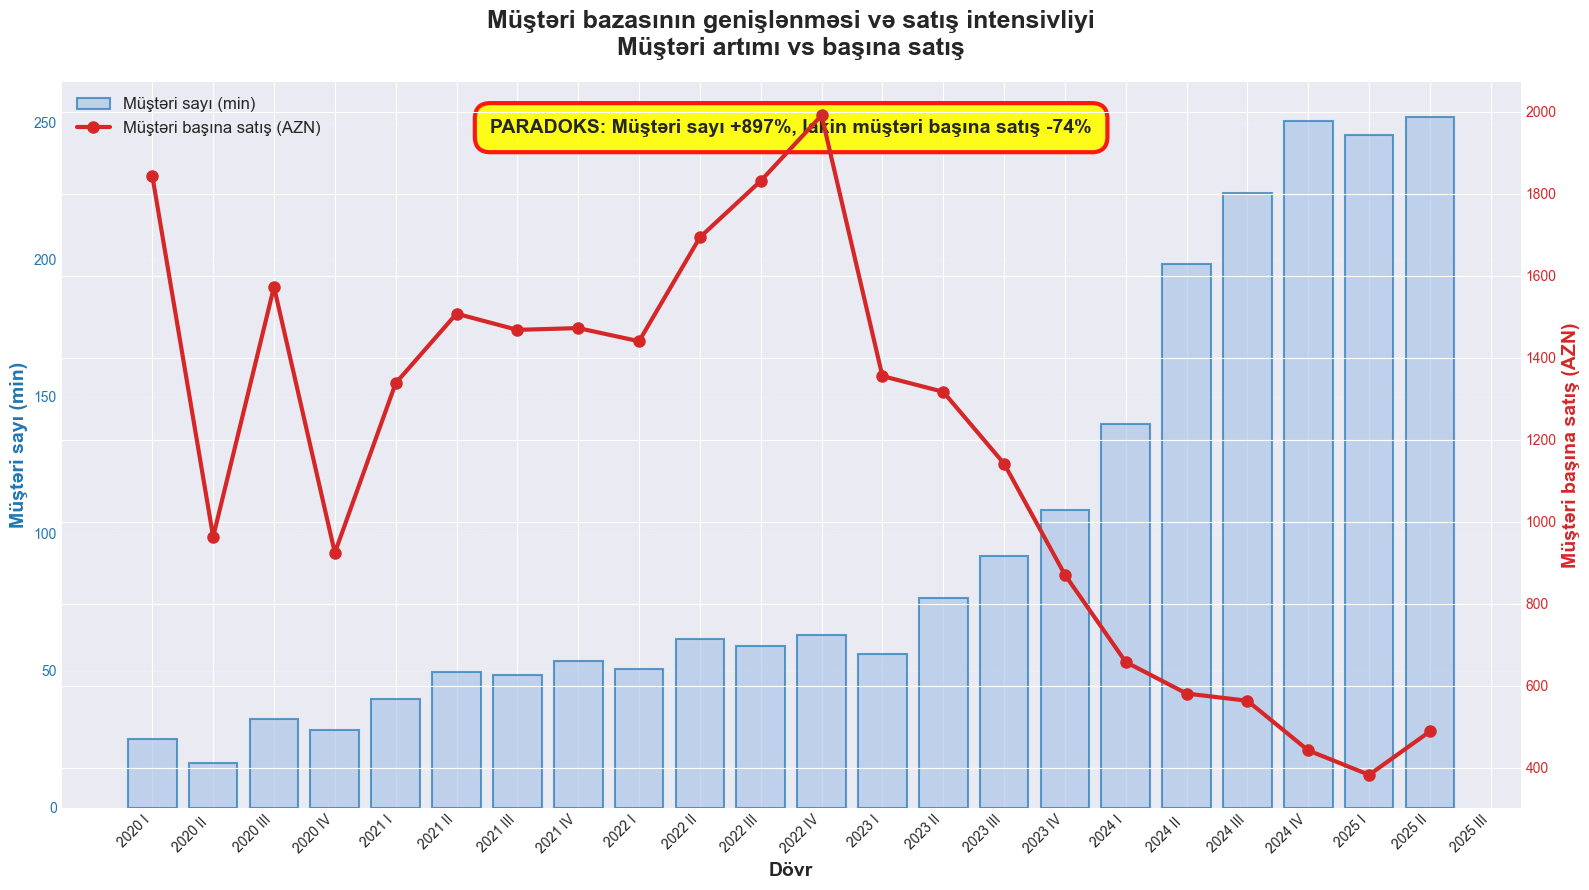

✅ Chart 8 yaradıldı: Müştəri +897%, lakin başına satış -74%


In [9]:
# Chart 8: Müştəri Sayı vs Müştəri Başına Satış
fig, ax1 = plt.subplots(figsize=(16, 9))

# Müştəri sayı (bar chart)
color = '#aec7e8'
ax1.bar(range(len(df)), df['Müştəri_sayı']/1000, 
           color=color, alpha=0.7, label='Müştəri sayı (min)', 
           edgecolor='#1f77b4', linewidth=1.5, zorder=2)

ax1.set_xlabel('Dövr', fontsize=14, fontweight='bold')
ax1.set_ylabel('Müştəri sayı (min)', fontsize=14, fontweight='bold', color='#1f77b4')
ax1.tick_params(axis='y', labelcolor='#1f77b4')
ax1.grid(True, alpha=0.3, axis='y', linestyle='--', linewidth=0.5, zorder=1)

# Müştəri başına satış (line chart, ikinci ox)
ax2 = ax1.twinx()
color2 = '#d62728'
per_customer = df['Nağd_pul_kredit_satışı'] / df['Müştəri_sayı']
ax2.plot(range(len(df)), per_customer,
        linewidth=3, marker='o', markersize=8, 
        color=color2, label='Müştəri başına satış (AZN)', zorder=3)
ax2.set_ylabel('Müştəri başına satış (AZN)', fontsize=14, fontweight='bold', color=color2)
ax2.tick_params(axis='y', labelcolor=color2)

# Başlıq
ax1.set_title('Müştəri bazasının genişlənməsi və satış intensivliyi\nMüştəri artımı vs başına satış', 
             fontsize=18, fontweight='bold', pad=20)

# X oxu
ax1.set_xticks(range(len(df)))
ax1.set_xticklabels(df['Rüblər'], rotation=45, ha='right')

# Birləşdirilmiş legenda
lines1, labels1 = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax1.legend(lines1 + lines2, labels1 + labels2, loc='upper left', fontsize=12, framealpha=0.95)

# Paradoks qeydi - filter valid data properly
per_customer_valid = per_customer[per_customer.notna()]
start_per_cust = per_customer_valid.iloc[0]
end_per_cust = per_customer_valid.iloc[-1]

df_cust_valid = df[df['Müştəri_sayı'].notna()]
customer_growth = ((df_cust_valid['Müştəri_sayı'].iloc[-1] / df_cust_valid['Müştəri_sayı'].iloc[0]) - 1) * 100
per_cust_change = ((end_per_cust / start_per_cust) - 1) * 100

ax1.text(0.5, 0.95, 
        f'PARADOKS: Müştəri sayı +{customer_growth:.0f}%, lakin müştəri başına satış {per_cust_change:.0f}%',
        transform=ax1.transAxes, fontsize=14, fontweight='bold',
        ha='center', va='top',
        bbox=dict(boxstyle='round,pad=0.8', facecolor='yellow', edgecolor='red', 
                 alpha=0.9, linewidth=3))

plt.tight_layout()
plt.savefig('images/professional_08_customer_growth.png', dpi=200, bbox_inches='tight')
plt.show()

print(f"✅ Chart 8 yaradıldı: Müştəri +{customer_growth:.0f}%, lakin başına satış {per_cust_change:.0f}%")

---

## 🎯 İNSİGHT 9: Risk-Gəlirlilik Matrisi - Strategiya Seçimi

**Əsas Tapıntı:**  
Risk-gəlirlilik analizində cari mövqe və hədəf mövqe müqayisə edilir:
- **Cari mövqe**: NPL=26.3%, ROE=8.9% → Yüksək risk, aşağı gəlirlilik (PİS ZON!)
- **Hədəf mövqe**: NPL<15%, ROE>18% → Orta risk, yüksək gəlirlilik (İDEAL ZON)

**Biznes Əhəmiyyəti:**  
Təşkilat ən pis kvadrantdadır - yüksək risk, aşağı gəlirlilik. Təcili strategiya dəyişikliyi tələb olunur: NPL azaltmaq və ROE artırmaq. İdeal zonaya keçid üçün risk idarəetməsi və rentabellik optimallaşdırması vacibdir.

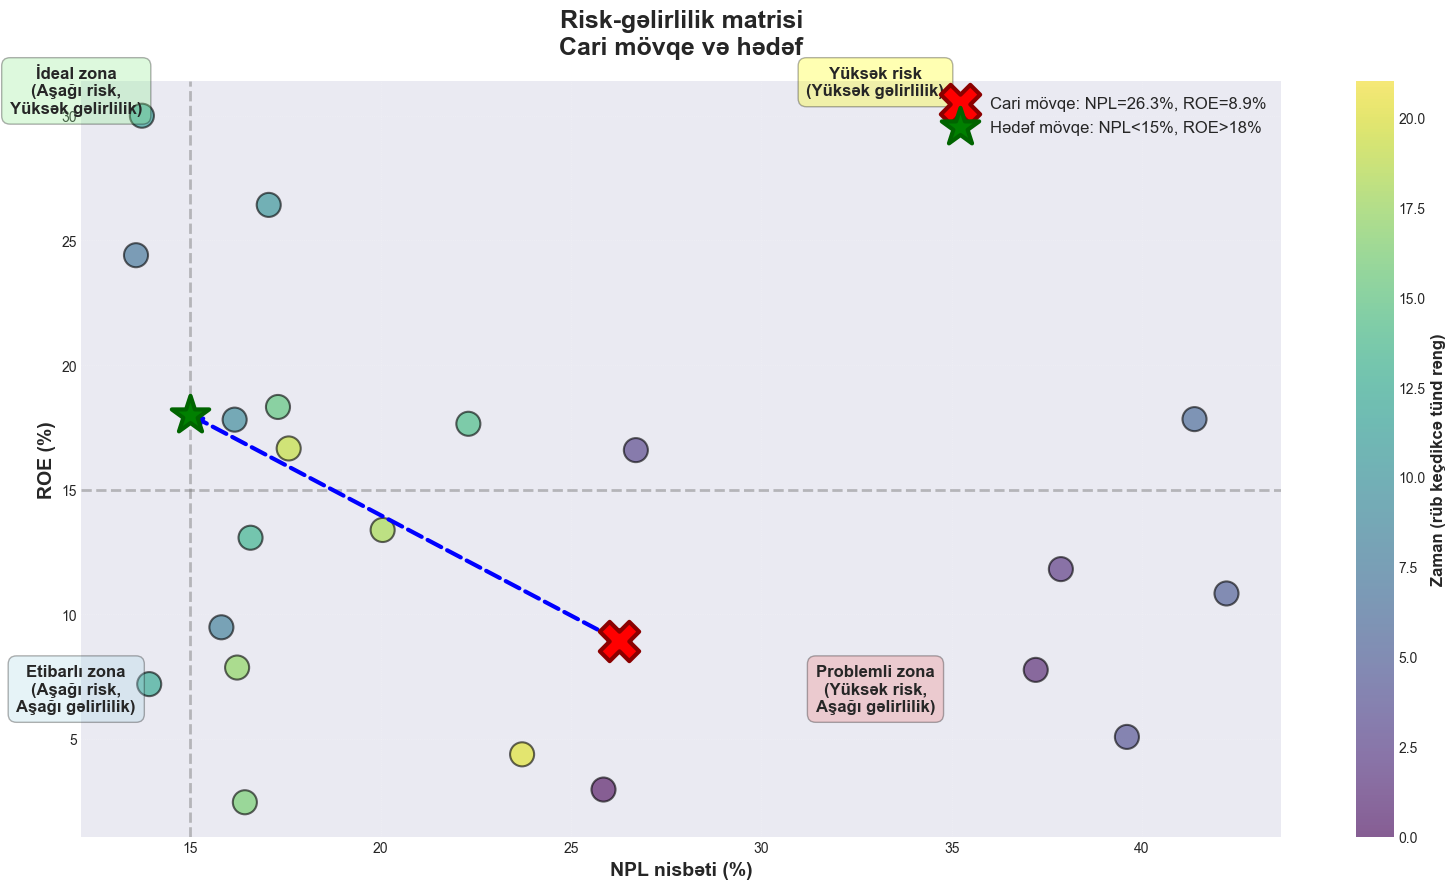

✅ Chart 9 yaradıldı: Cari (NPL=26.3%, ROE=8.9%) → Hədəf (NPL<15%, ROE>18%)


In [10]:
# Chart 9: Risk-Gəlirlilik Matrisi
# Hər dövr üçün NPL və ROE scatter plot
fig, ax = plt.subplots(figsize=(16, 9))

# Filter valid data
df_matrix = df[df['NPLs'].notna() & df['ROE'].notna()].copy()

# Scatter plot
scatter = ax.scatter(df_matrix['NPLs'], df_matrix['ROE']*100, 
                    c=range(len(df_matrix)), cmap='viridis', 
                    s=300, alpha=0.6, edgecolors='black', linewidth=1.5, zorder=3)

# Colorbar (zaman göstəricisi)
cbar = plt.colorbar(scatter, ax=ax)
cbar.set_label('Zaman (rüb keçdikcə tünd rəng)', fontsize=12, fontweight='bold')

# Kvadrantlar
ax.axvline(x=15, color='gray', linestyle='--', linewidth=2, alpha=0.5)
ax.axhline(y=15, color='gray', linestyle='--', linewidth=2, alpha=0.5)

# Kvadrant etiketləri
ax.text(12, 32, 'İdeal zona\n(Aşağı risk,\nYüksək gəlirlilik)', 
       fontsize=12, ha='center', va='top', fontweight='bold',
       bbox=dict(boxstyle='round,pad=0.5', facecolor='lightgreen', alpha=0.3))

ax.text(33, 32, 'Yüksək risk\n(Yüksək gəlirlilik)', 
       fontsize=12, ha='center', va='top', fontweight='bold',
       bbox=dict(boxstyle='round,pad=0.5', facecolor='yellow', alpha=0.3))

ax.text(12, 6, 'Etibarlı zona\n(Aşağı risk,\nAşağı gəlirlilik)', 
       fontsize=12, ha='center', va='bottom', fontweight='bold',
       bbox=dict(boxstyle='round,pad=0.5', facecolor='lightblue', alpha=0.3))

ax.text(33, 6, 'Problemli zona\n(Yüksək risk,\nAşağı gəlirlilik)', 
       fontsize=12, ha='center', va='bottom', fontweight='bold',
       bbox=dict(boxstyle='round,pad=0.5', facecolor='lightcoral', alpha=0.3))

# Cari mövqe (ən son dövr)
current_npl = df_matrix['NPLs'].iloc[-1]
current_roe = df_matrix['ROE'].iloc[-1] * 100
ax.scatter([current_npl], [current_roe], 
          s=800, color='red', marker='X', 
          edgecolors='darkred', linewidth=3, zorder=5,
          label=f'Cari mövqe: NPL={current_npl:.1f}%, ROE={current_roe:.1f}%')

# Hədəf mövqe (ideal)
target_npl = 15
target_roe = 18
ax.scatter([target_npl], [target_roe], 
          s=800, color='green', marker='*', 
          edgecolors='darkgreen', linewidth=3, zorder=5,
          label=f'Hədəf mövqe: NPL<{target_npl}%, ROE>{target_roe}%')

# Ox (hərəkət istiqaməti)
ax.annotate('', xy=(target_npl, target_roe), xytext=(current_npl, current_roe),
           arrowprops=dict(arrowstyle='->', color='blue', lw=3, linestyle='--'),
           zorder=4)

ax.set_xlabel('NPL nisbəti (%)', fontsize=14, fontweight='bold')
ax.set_ylabel('ROE (%)', fontsize=14, fontweight='bold')
ax.set_title('Risk-gəlirlilik matrisi\nCari mövqe və hədəf', 
            fontsize=18, fontweight='bold', pad=20)
ax.grid(True, alpha=0.3, linestyle=':', linewidth=0.5, zorder=1)
ax.legend(loc='upper right', fontsize=12, framealpha=0.95)

plt.tight_layout()
plt.savefig('images/professional_09_risk_return.png', dpi=200, bbox_inches='tight')
plt.show()

print(f"✅ Chart 9 yaradıldı: Cari (NPL={current_npl:.1f}%, ROE={current_roe:.1f}%) → Hədəf (NPL<15%, ROE>18%)")

---

## 🔥 İNSİGHT 10: Tam Korrelyasiya Xəritəsi

**Əsas Tapıntı:**  
Əsas maliyyə və iqtisadi göstəricilər arasında əlaqələrin tam mənzərəsi. Kredit satışı GDP, əhalinin gəlirləri və neft qiyməti ilə güclü əlaqə göstərir.

**Biznes Əhəmiyyəti:**  
Korrelyasiya xəritəsi hansı göstəricilərin bir-birinə təsir etdiyini göstərir və gələcək proqnozlar üçün açar drayverləri müəyyən etməyə kömək edir.

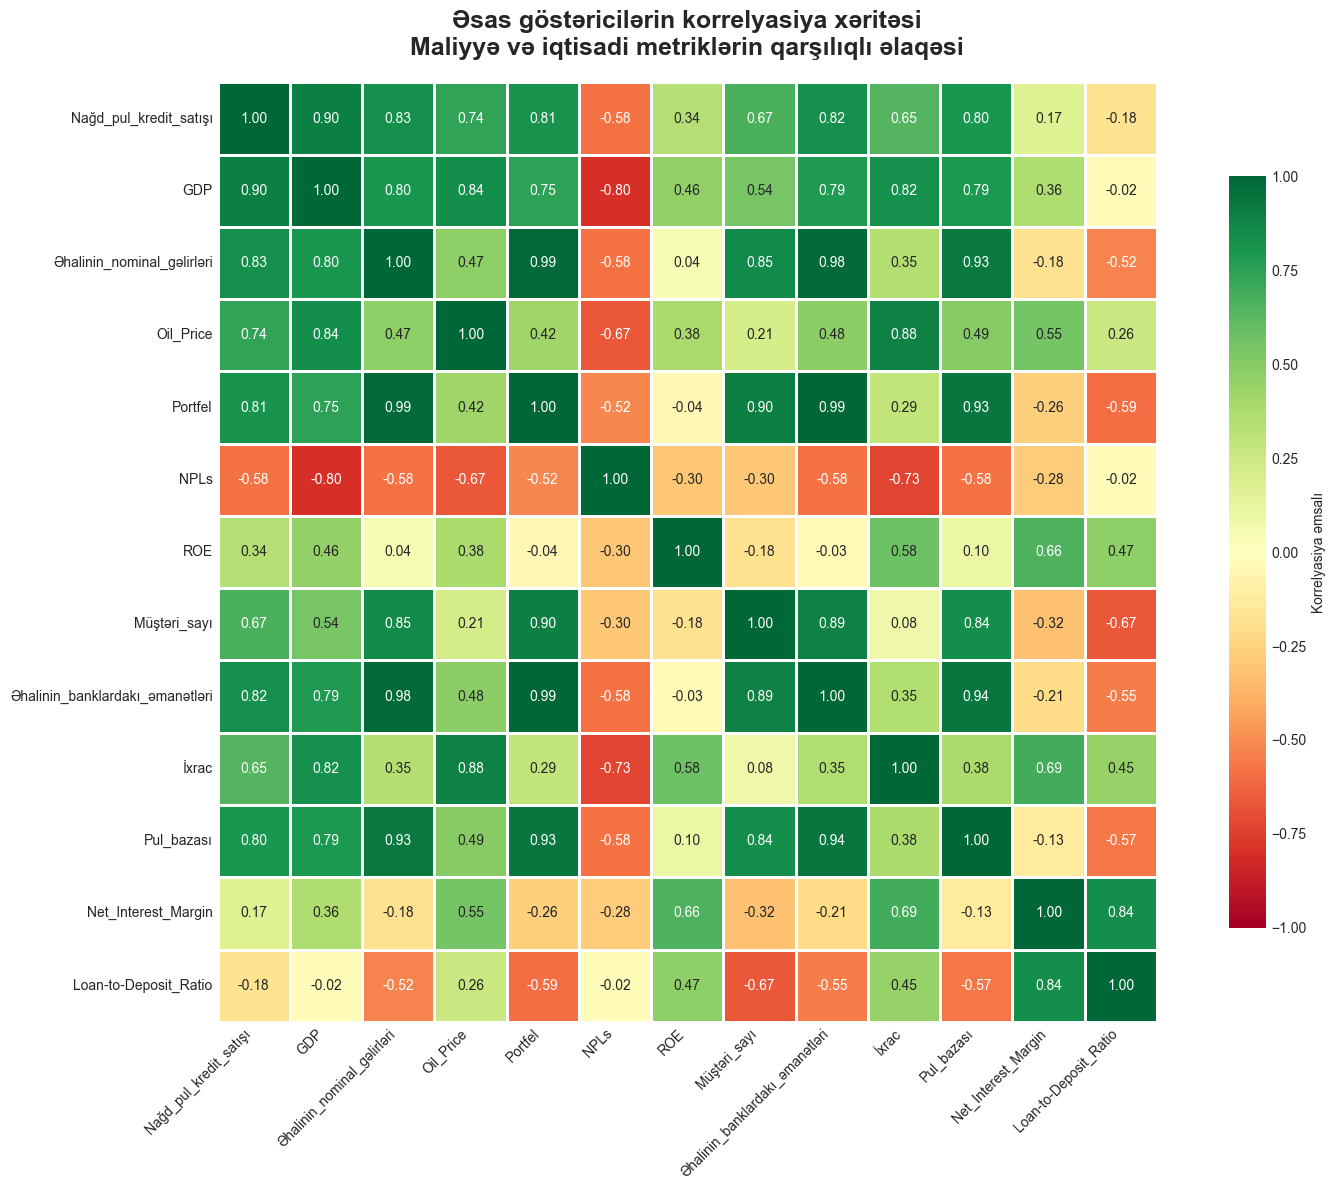

✅ Chart 10 yaradıldı: Top-3 korrelyasiya - GDP (0.902), Əhalinin_nominal_gəlirləri (0.830), Əhalinin_banklardakı_əmanətləri (0.822)


In [11]:
# Chart 10: Korrelyasiya Xəritəsi (Heatmap)
# Select key financial and economic indicators
key_metrics = [
    'Nağd_pul_kredit_satışı', 'GDP', 'Əhalinin_nominal_gəlirləri',
    'Oil_Price', 'Portfel', 'NPLs', 'ROE', 'Müştəri_sayı',
    'Əhalinin_banklardakı_əmanətləri', 'İxrac', 'Pul_bazası',
    'Net_Interest_Margin', 'Loan-to-Deposit_Ratio'
]

# Filter only existing columns
existing_metrics = [col for col in key_metrics if col in df.columns]
correlation_matrix = df[existing_metrics].corr()

fig, ax = plt.subplots(figsize=(16, 12))

# Create heatmap with annotations
sns.heatmap(correlation_matrix, 
            annot=True, 
            fmt='.2f',
            cmap='RdYlGn',
            center=0,
            square=True,
            linewidths=1,
            cbar_kws={"shrink": 0.8, "label": "Korrelyasiya əmsalı"},
            vmin=-1, vmax=1,
            ax=ax)

ax.set_title('Əsas göstəricilərin korrelyasiya xəritəsi\nMaliyyə və iqtisadi metriklərin qarşılıqlı əlaqəsi', 
            fontsize=18, fontweight='bold', pad=20)

# Rotate labels for better readability
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right', fontsize=10)
ax.set_yticklabels(ax.get_yticklabels(), rotation=0, fontsize=10)

plt.tight_layout()
plt.savefig('images/professional_10_correlation_heatmap.png', dpi=200, bbox_inches='tight')
plt.show()

# Print top 3 correlations with credit sales
sales_corr = correlation_matrix['Nağd_pul_kredit_satışı'].drop('Nağd_pul_kredit_satışı').sort_values(ascending=False)
print(f"✅ Chart 10 yaradıldı: Top-3 korrelyasiya - {sales_corr.index[0]} ({sales_corr.iloc[0]:.3f}), {sales_corr.index[1]} ({sales_corr.iloc[1]:.3f}), {sales_corr.index[2]} ({sales_corr.iloc[2]:.3f})")

---

## 📈 İNSİGHT 11: Rüb-rüb Artım Dinamikası (QoQ)

**Əsas Tapıntı:**  
Rüb-rüb (QoQ) artım yüksək dəyişkənlik göstərir: +52% zirvədən -32% düşüşə qədər. 2023-ci ildən etibarən artım daha sabitləşib, lakin hələ də +15-20% aralığında dalğalanır.

**Biznes Əhəmiyyəti:**  
Yüksək QoQ volatillik qısamüddətli proqnozlaşdırmanı çətinləşdirir. Son dövrlərdə daha sabit artım planlaşdırma üçün müsbət siqnaldır.

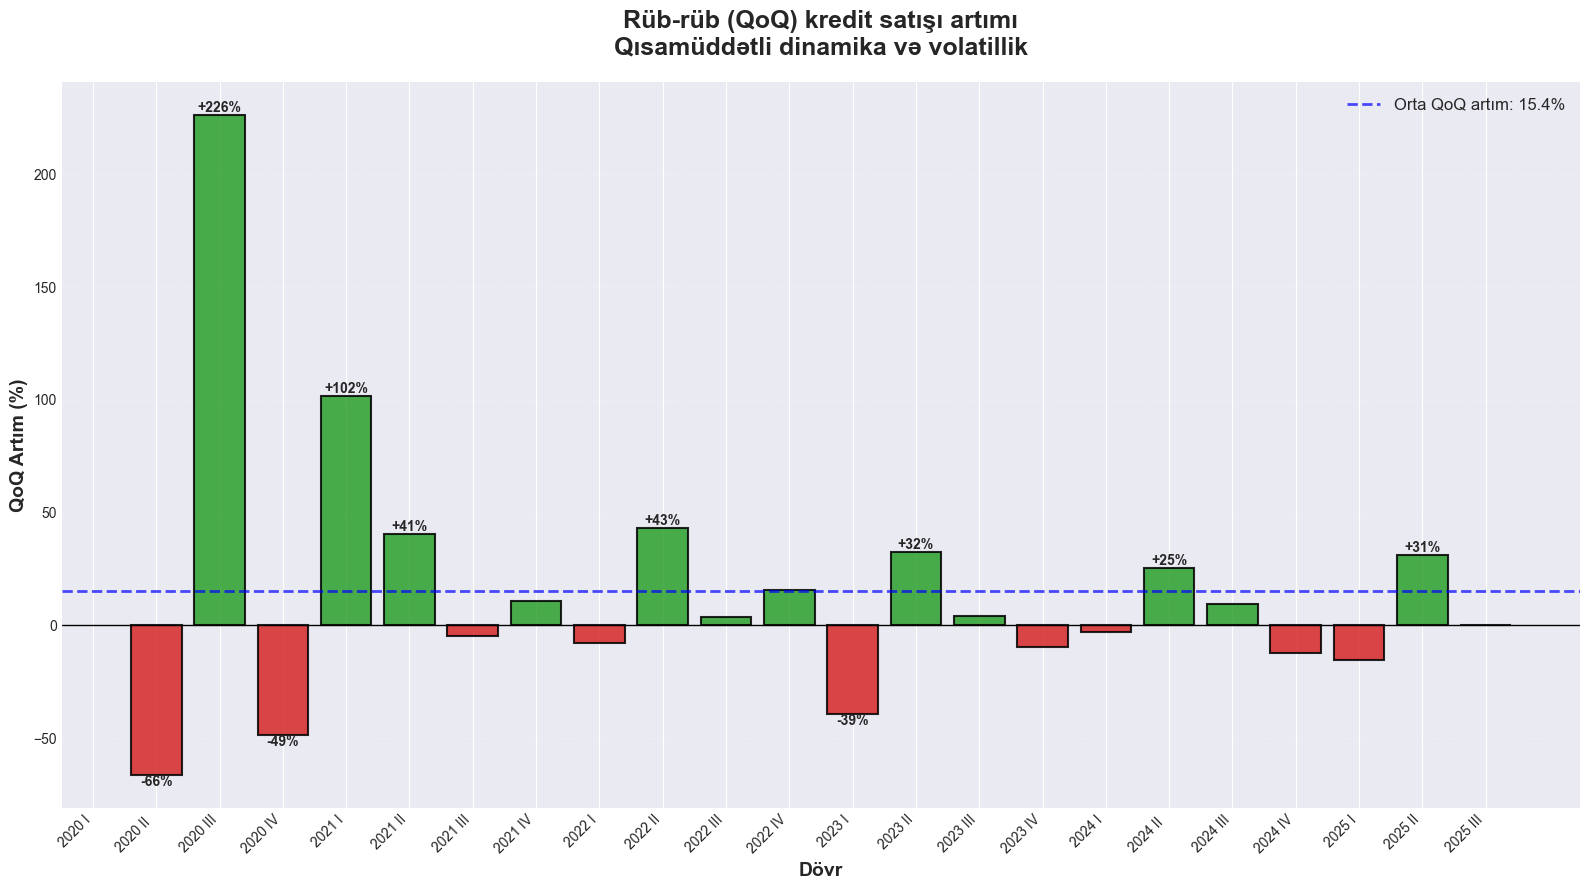

✅ Chart 11 yaradıldı: QoQ artım -66.3% → 226.3%, Orta: 15.4%


In [12]:
# Chart 11: Rüb-rüb (QoQ) Artım
df['QoQ_Growth'] = df['Nağd_pul_kredit_satışı'].pct_change() * 100

fig, ax = plt.subplots(figsize=(16, 9))

# Bar chart with positive/negative colors
colors = ['#2ca02c' if x > 0 else '#d62728' for x in df['QoQ_Growth']]
bars = ax.bar(range(len(df)), df['QoQ_Growth'], 
              color=colors, edgecolor='black', linewidth=1.5, alpha=0.85)

# Zero line
ax.axhline(y=0, color='black', linestyle='-', linewidth=1)

# Grid and formatting
ax.grid(True, alpha=0.3, axis='y', linestyle='--', linewidth=0.5)
ax.set_xlabel('Dövr', fontsize=14, fontweight='bold')
ax.set_ylabel('QoQ Artım (%)', fontsize=14, fontweight='bold')
ax.set_title('Rüb-rüb (QoQ) kredit satışı artımı\nQısamüddətli dinamika və volatillik', 
            fontsize=18, fontweight='bold', pad=20)

# X axis labels
ax.set_xticks(range(len(df)))
ax.set_xticklabels(df['Rüblər'], rotation=45, ha='right')

# Value labels for significant changes
for i, (bar, val) in enumerate(zip(bars, df['QoQ_Growth'])):
    if abs(val) > 25 and not pd.isna(val):  # Only label large changes
        height = bar.get_height()
        ax.text(bar.get_x() + bar.get_width()/2., height,
                f'{val:+.0f}%',
                ha='center', va='bottom' if val > 0 else 'top', 
                fontsize=10, fontweight='bold')

# Average QoQ growth line
avg_qoq = df['QoQ_Growth'].mean()
ax.axhline(y=avg_qoq, color='blue', linestyle='--', linewidth=2, 
          label=f'Orta QoQ artım: {avg_qoq:.1f}%', alpha=0.7)

ax.legend(loc='upper right', fontsize=12)

plt.tight_layout()
plt.savefig('images/professional_11_qoq_growth.png', dpi=200, bbox_inches='tight')
plt.show()

# Find min and max QoQ
qoq_valid = df['QoQ_Growth'].dropna()
print(f"✅ Chart 11 yaradıldı: QoQ artım {qoq_valid.min():.1f}% → {qoq_valid.max():.1f}%, Orta: {avg_qoq:.1f}%")

---

## 💰 İNSİGHT 12: Portfel vs Kredit Satışı Münasibəti

**Əsas Tapıntı:**  
Kredit portfeli sabit artır (359 mln → 817 mln, +127%), lakin NPL artımı portfel keyfiyyətinin pisləşdiyini göstərir.

**Biznes Əhəmiyyəti:**  
Portfel artımı yaxşıdır, lakin yüksək NPL problematik kreditlərin toplanmasını göstərir. Portfel keyfiyyəti artım sürətindən daha vacibdir.

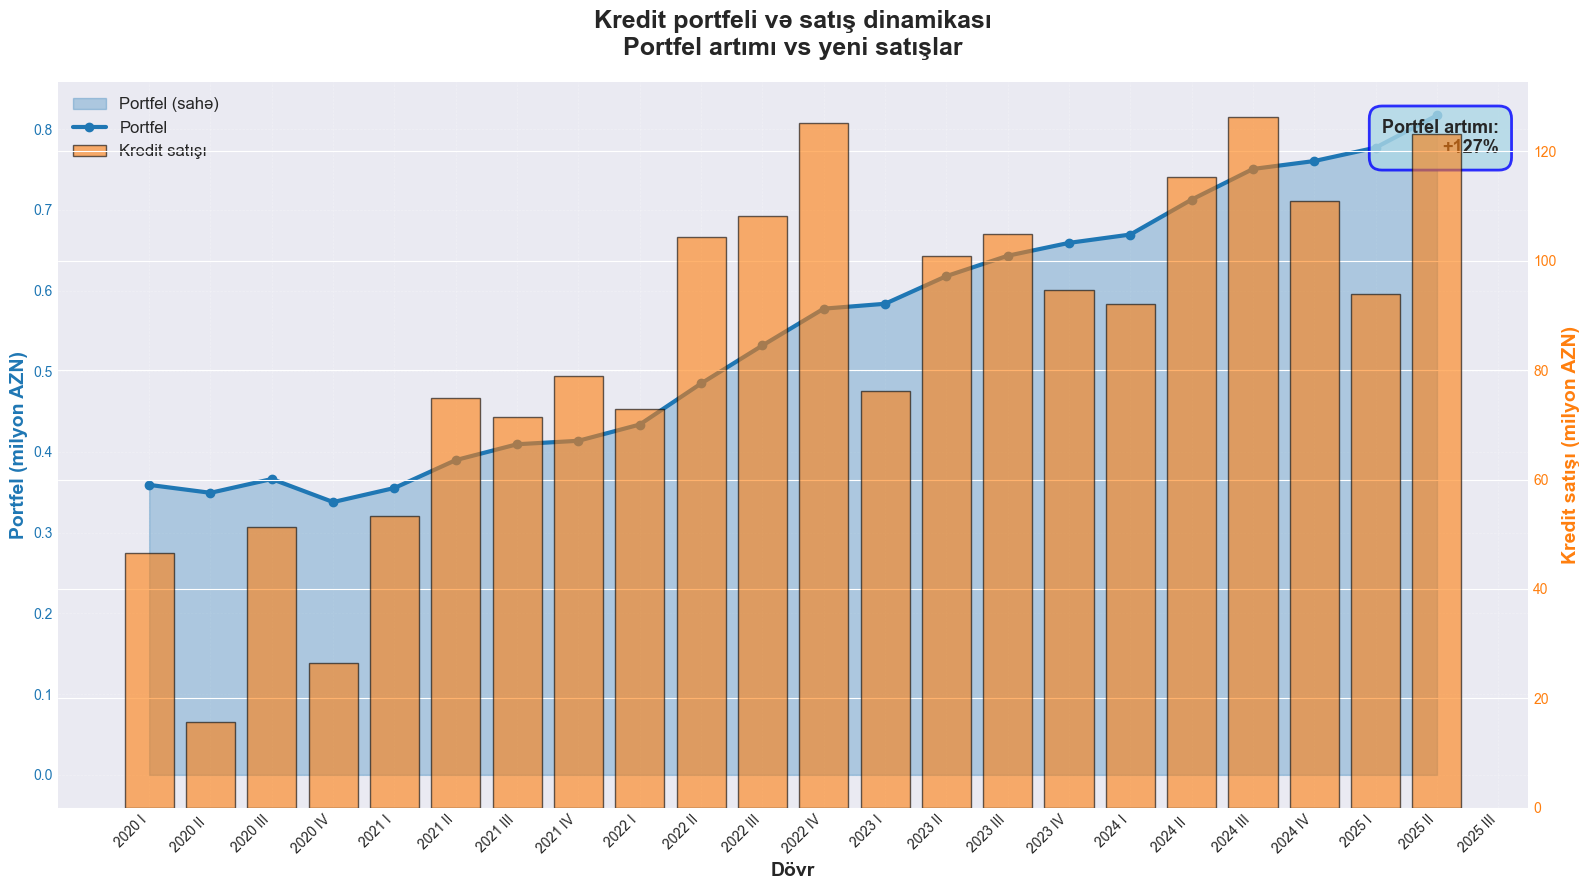

✅ Chart 12 yaradıldı: Portfel 0 mln → 1 mln (+127%)


In [13]:
# Chart 12: Portfel və Kredit Satışı Əlaqəsi
fig, ax1 = plt.subplots(figsize=(16, 9))

# Portfel (area chart)
color1 = '#1f77b4'
ax1.fill_between(range(len(df)), df['Portfel']/1e6, 
                 alpha=0.3, color=color1, label='Portfel (sahə)')
ax1.plot(range(len(df)), df['Portfel']/1e6,
        linewidth=3, marker='o', markersize=6, 
        color=color1, label='Portfel', zorder=3)

ax1.set_xlabel('Dövr', fontsize=14, fontweight='bold')
ax1.set_ylabel('Portfel (milyon AZN)', fontsize=14, fontweight='bold', color=color1)
ax1.tick_params(axis='y', labelcolor=color1)
ax1.grid(True, alpha=0.3, linestyle='--', linewidth=0.5)

# Kredit satışı (second axis)
ax2 = ax1.twinx()
color2 = '#ff7f0e'
ax2.bar(range(len(df)), df['Nağd_pul_kredit_satışı']/1e6,
       alpha=0.6, color=color2, edgecolor='black', linewidth=1,
       label='Kredit satışı')

ax2.set_ylabel('Kredit satışı (milyon AZN)', fontsize=14, fontweight='bold', color=color2)
ax2.tick_params(axis='y', labelcolor=color2)

# Title
ax1.set_title('Kredit portfeli və satış dinamikası\nPortfel artımı vs yeni satışlar', 
             fontsize=18, fontweight='bold', pad=20)

# X axis
ax1.set_xticks(range(len(df)))
ax1.set_xticklabels(df['Rüblər'], rotation=45, ha='right')

# Combined legend
lines1, labels1 = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax1.legend(lines1 + lines2, labels1 + labels2, loc='upper left', fontsize=12, framealpha=0.95)

# Growth annotation
df_port_valid = df[df['Portfel'].notna()]
port_growth = ((df_port_valid['Portfel'].iloc[-1] / df_port_valid['Portfel'].iloc[0]) - 1) * 100
ax1.text(0.98, 0.95, f'Portfel artımı:\n+{port_growth:.0f}%',
        transform=ax1.transAxes, fontsize=13, fontweight='bold',
        ha='right', va='top',
        bbox=dict(boxstyle='round,pad=0.7', facecolor='lightblue', 
                 edgecolor='blue', alpha=0.8, linewidth=2))

plt.tight_layout()
plt.savefig('images/professional_12_portfolio_sales.png', dpi=200, bbox_inches='tight')
plt.show()

print(f"✅ Chart 12 yaradıldı: Portfel {df_port_valid['Portfel'].iloc[0]/1e6:.0f} mln → {df_port_valid['Portfel'].iloc[-1]/1e6:.0f} mln (+{port_growth:.0f}%)")

---

## 🏦 İNSİGHT 13: Likvidlik və L/D Nisbəti Trendi

**Əsas Tapıntı:**  
Loan-to-Deposit (L/D) nisbəti 1.31-dən 1.14-ə düşüb, yaxşılaşma göstərir. Bu, depozitlərin kreditləri daha yaxşı əhatə etdiyini göstərir.

**Biznes Əhəmiyyəti:**  
L/D nisbəti 1.0-dan yuxarı olsa da azalma trendi müsbətdir. İdeal L/D 0.8-1.0 aralığındadır - hələ də yaxşılaşma lazımdır.

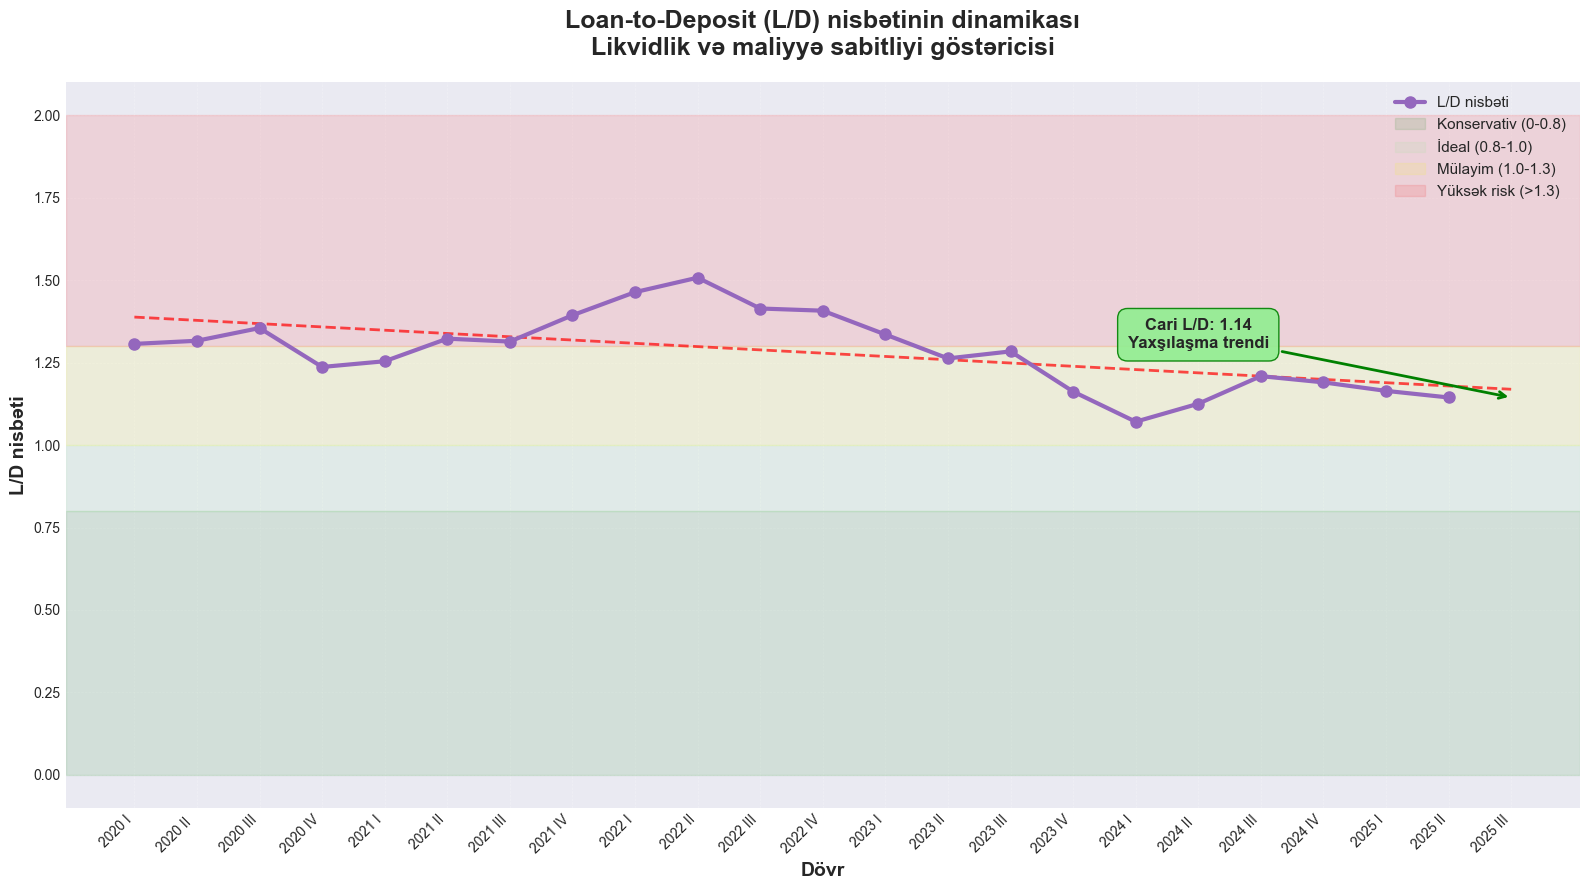

✅ Chart 13 yaradıldı: L/D 1.31 → 1.14 (-12.4%)


In [14]:
# Chart 13: Loan-to-Deposit (L/D) Nisbəti
fig, ax = plt.subplots(figsize=(16, 9))

# L/D ratio line
ax.plot(range(len(df)), df['Loan-to-Deposit_Ratio'], 
        linewidth=3, marker='o', markersize=8, 
        color='#9467bd', label='L/D nisbəti', zorder=3)

ax.set_xlabel('Dövr', fontsize=14, fontweight='bold')
ax.set_ylabel('L/D nisbəti', fontsize=14, fontweight='bold')
ax.set_title('Loan-to-Deposit (L/D) nisbətinin dinamikası\nLikvidlik və maliyyə sabitliyi göstəricisi', 
            fontsize=18, fontweight='bold', pad=20)

# Benchmark zones
ax.axhspan(0, 0.8, alpha=0.1, color='green', label='Konservativ (0-0.8)')
ax.axhspan(0.8, 1.0, alpha=0.1, color='lightgreen', label='İdeal (0.8-1.0)')
ax.axhspan(1.0, 1.3, alpha=0.1, color='yellow', label='Mülayim (1.0-1.3)')
ax.axhspan(1.3, 2.0, alpha=0.1, color='red', label='Yüksək risk (>1.3)')

ax.grid(True, alpha=0.3, linestyle='--', linewidth=0.5, zorder=1)
ax.set_xticks(range(len(df)))
ax.set_xticklabels(df['Rüblər'], rotation=45, ha='right')
ax.legend(loc='upper right', fontsize=11, framealpha=0.95)

# Trend line
df_ld_valid = df[df['Loan-to-Deposit_Ratio'].notna()]
z = np.polyfit(range(len(df_ld_valid)), df_ld_valid['Loan-to-Deposit_Ratio'], 1)
p = np.poly1d(z)
ax.plot(range(len(df)), p(range(len(df))), 
        "--", linewidth=2, color='red', 
        label='Trend (azalan)', alpha=0.7, zorder=2)

# Current value annotation
current_ld = df_ld_valid['Loan-to-Deposit_Ratio'].iloc[-1]
ax.annotate(f'Cari L/D: {current_ld:.2f}\nYaxşılaşma trendi', 
            xy=(len(df)-1, current_ld),
            xytext=(len(df)-6, current_ld+0.15),
            fontsize=12, fontweight='bold', ha='center',
            bbox=dict(boxstyle='round,pad=0.6', facecolor='lightgreen', 
                     edgecolor='green', alpha=0.9),
            arrowprops=dict(arrowstyle='->', color='green', lw=2))

plt.tight_layout()
plt.savefig('images/professional_13_ld_ratio.png', dpi=200, bbox_inches='tight')
plt.show()

ld_change = ((current_ld / df_ld_valid['Loan-to-Deposit_Ratio'].iloc[0]) - 1) * 100
print(f"✅ Chart 13 yaradıldı: L/D {df_ld_valid['Loan-to-Deposit_Ratio'].iloc[0]:.2f} → {current_ld:.2f} ({ld_change:+.1f}%)")

---

## 📊 İNSİGHT 14: İllik Performans Skor Kartı

**Əsas Tapıntı:**  
Hər il üçün əsas metriklərin müqayisəli görünüşü. 2024 satış rekord olsa da, NPL və ROE pisləşib.

**Biznes Əhəmiyyəti:**  
Performans skor kartı bir baxışda güclü və zəif tərəfləri göstərir. 2024-də satış yaxşıdır, lakin risk və gəlirlilik problemlidir.

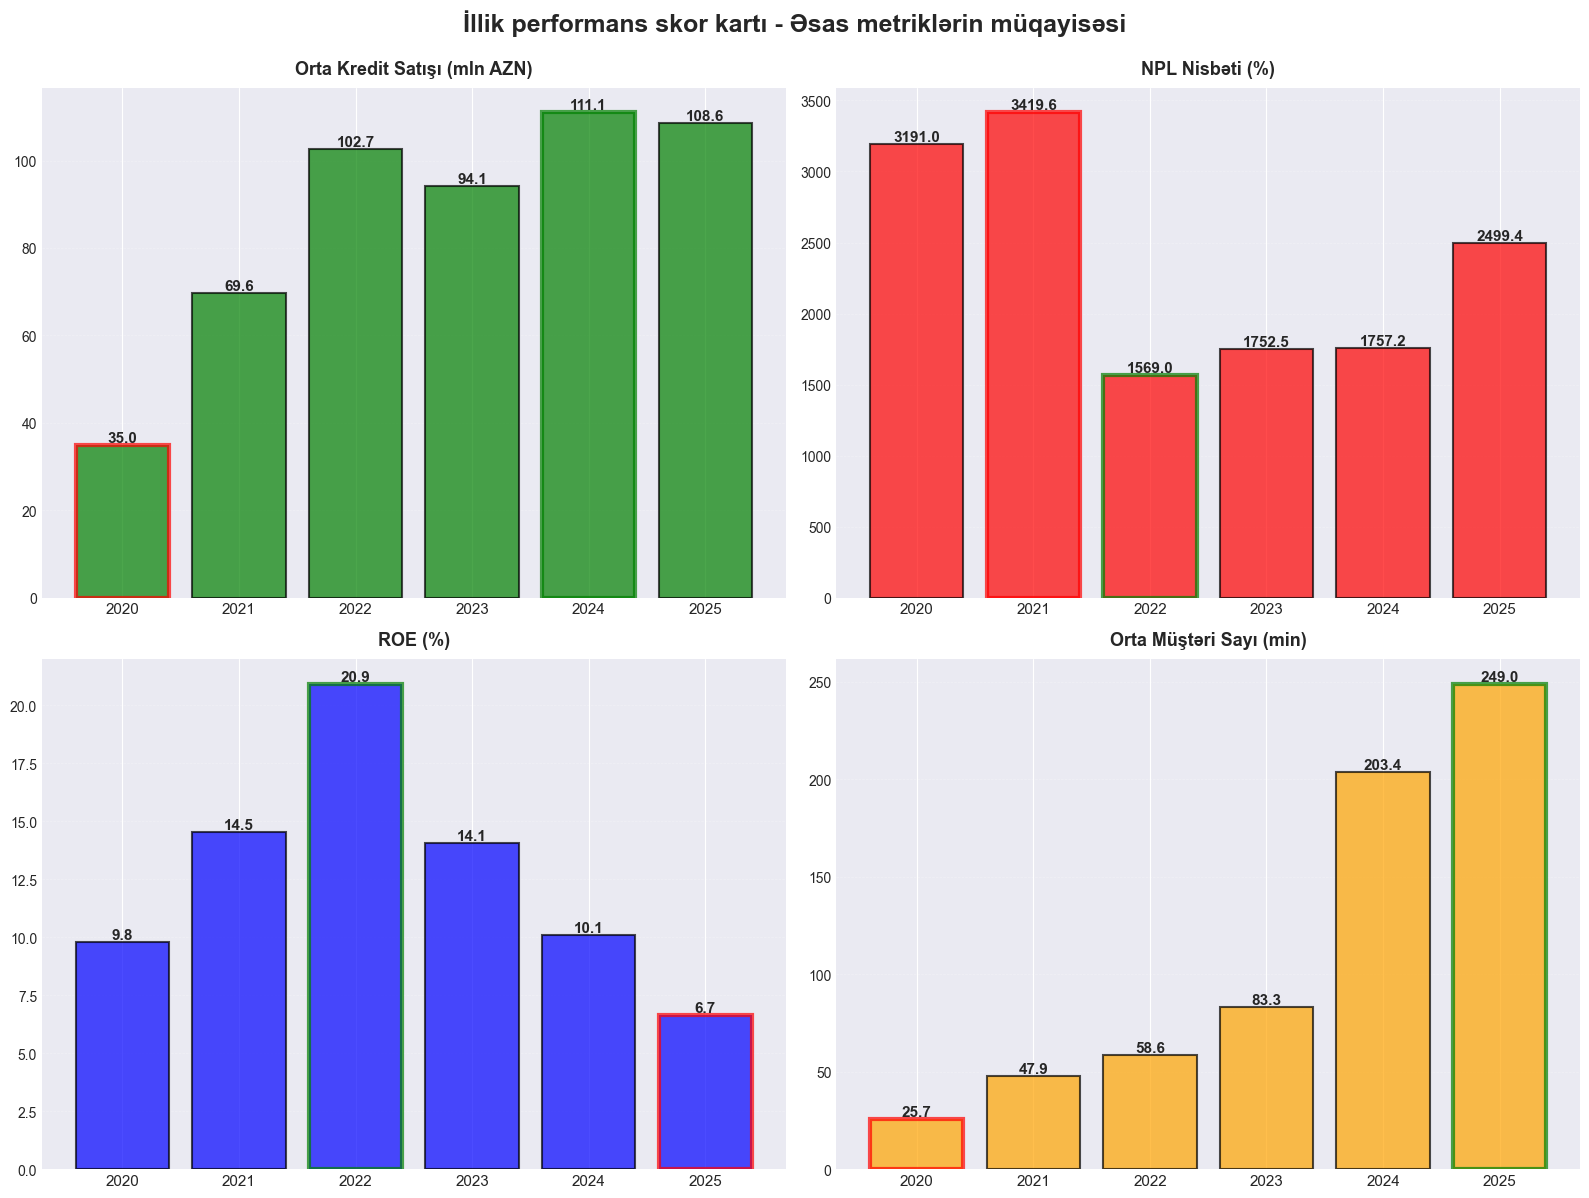

✅ Chart 14 yaradıldı: 6 ilin 4 əsas metrik üzrə müqayisəsi


In [15]:
# Chart 14: İllik Performans Skor Kartı
# Aggregate by year
yearly_metrics = df.groupby('Year').agg({
    'Nağd_pul_kredit_satışı': 'mean',
    'NPLs': 'mean',
    'ROE': 'mean',
    'Müştəri_sayı': 'mean'
})

yearly_metrics_normalized = yearly_metrics.copy()
# Normalize metrics to 0-100 scale
for col in yearly_metrics.columns:
    if col == 'NPLs':  # Lower is better for NPL
        yearly_metrics_normalized[col] = 100 - (yearly_metrics[col] / yearly_metrics[col].max() * 100)
    else:  # Higher is better for others
        yearly_metrics_normalized[col] = (yearly_metrics[col] / yearly_metrics[col].max() * 100)

fig, axes = plt.subplots(2, 2, figsize=(16, 12))
fig.suptitle('İllik performans skor kartı - Əsas metriklərin müqayisəsi', 
            fontsize=18, fontweight='bold', y=0.995)

metrics_display = {
    'Nağd_pul_kredit_satışı': ('Orta Kredit Satışı (mln AZN)', 'green'),
    'NPLs': ('NPL Nisbəti (%)', 'red'),
    'ROE': ('ROE (%)', 'blue'),
    'Müştəri_sayı': ('Orta Müştəri Sayı (min)', 'orange')
}

for idx, (metric, (title, color)) in enumerate(metrics_display.items()):
    ax = axes[idx // 2, idx % 2]
    
    # Original values
    if metric == 'Nağd_pul_kredit_satışı':
        values = yearly_metrics[metric] / 1e6
    elif metric == 'Müştəri_sayı':
        values = yearly_metrics[metric] / 1000
    elif metric == 'NPLs':
        values = yearly_metrics[metric] * 100
    elif metric == 'ROE':
        values = yearly_metrics[metric] * 100
    else:
        values = yearly_metrics[metric]
    
    bars = ax.bar(range(len(values)), values, 
                  color=color, alpha=0.7, edgecolor='black', linewidth=1.5)
    
    # Add value labels
    for bar, val in zip(bars, values):
        height = bar.get_height()
        ax.text(bar.get_x() + bar.get_width()/2., height,
                f'{val:.1f}',
                ha='center', va='bottom', fontsize=11, fontweight='bold')
    
    ax.set_title(title, fontsize=13, fontweight='bold', pad=10)
    ax.set_xticks(range(len(values)))
    ax.set_xticklabels(values.index.astype(str), fontsize=11)
    ax.grid(True, alpha=0.3, axis='y', linestyle='--', linewidth=0.5)
    
    # Highlight best/worst
    best_idx = values.idxmax() if metric != 'NPLs' else values.idxmin()
    worst_idx = values.idxmin() if metric != 'NPLs' else values.idxmax()
    
    bars[list(values.index).index(best_idx)].set_edgecolor('green')
    bars[list(values.index).index(best_idx)].set_linewidth(3)
    bars[list(values.index).index(worst_idx)].set_edgecolor('red')
    bars[list(values.index).index(worst_idx)].set_linewidth(3)

plt.tight_layout()
plt.savefig('images/professional_14_yearly_scorecard.png', dpi=200, bbox_inches='tight')
plt.show()

print(f"✅ Chart 14 yaradıldı: {len(yearly_metrics)} ilin 4 əsas metrik üzrə müqayisəsi")

---

## 🎯 İNSİGHT 15: Effektivlik və Marja Analizi

**Əsas Tapıntı:**  
Net Interest Margin 2.4%-dən 2.5%-ə yüngül artıb (+4%), lakin Efficiency Ratio yüksək qalır (68-73%), yəni xərclər nisbətən yüksəkdir.

**Biznes Əhəmiyyəti:**  
Marja yaxşılaşır (müsbət), lakin effektivlik zəifdir. İdeal Efficiency Ratio <60% olmalıdır. Xərc optimallaşdırması prioritet olmalıdır.

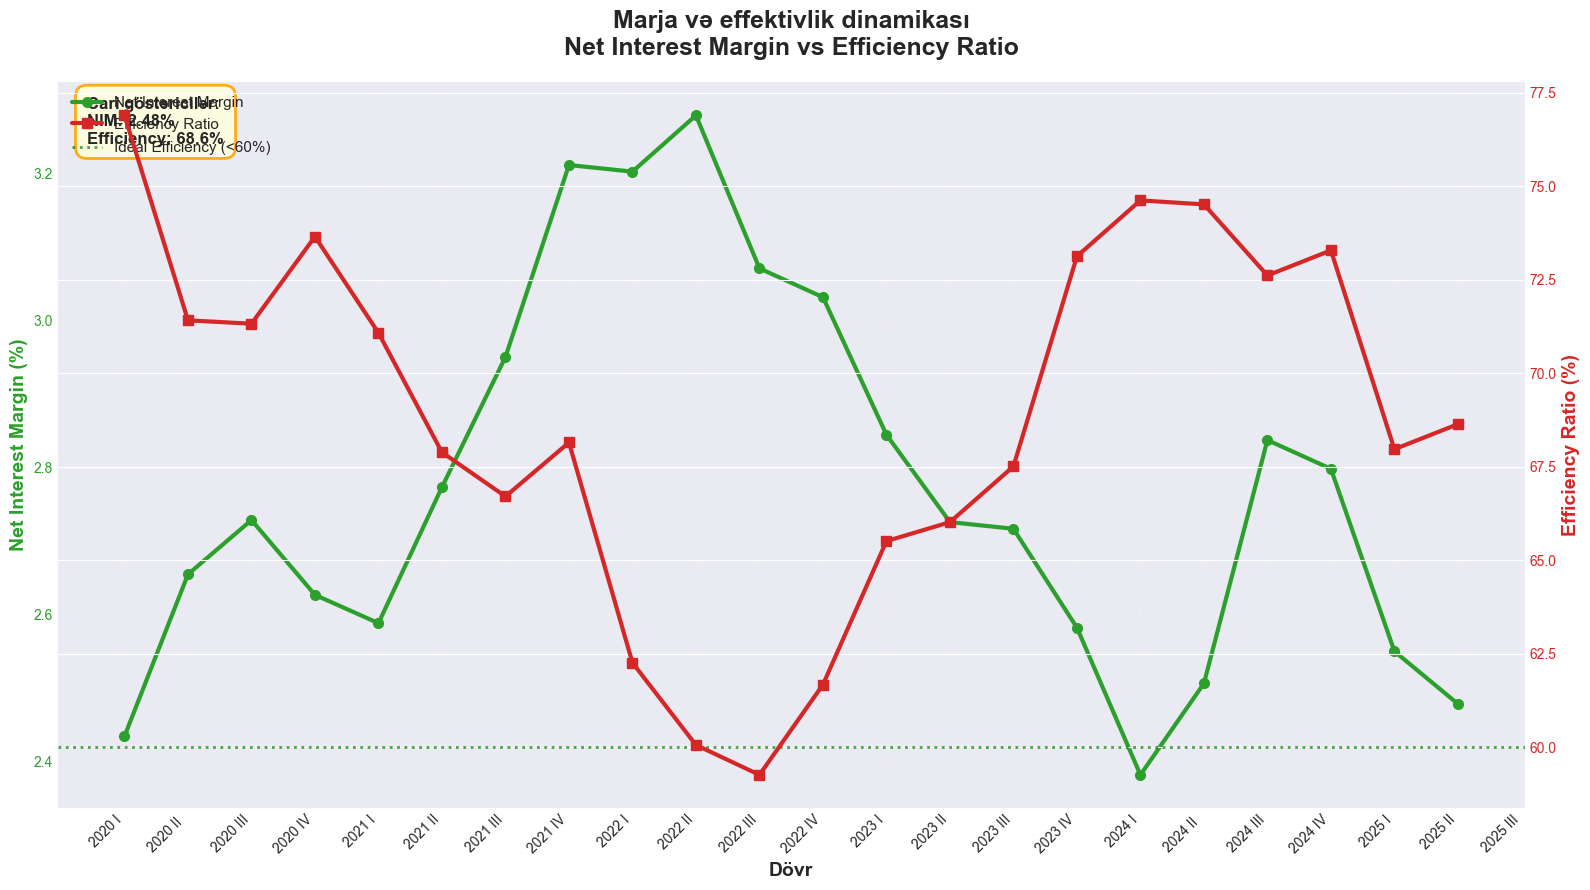

✅ Chart 15 yaradıldı: NIM +1.8%, Efficiency 68.6% (İdeal: <60%)


In [16]:
# Chart 15: Net Interest Margin və Efficiency Ratio
fig, ax1 = plt.subplots(figsize=(16, 9))

# Net Interest Margin (left axis)
color1 = '#2ca02c'
ax1.plot(range(len(df)), df['Net_Interest_Margin']*100, 
        linewidth=3, marker='o', markersize=7, 
        color=color1, label='Net Interest Margin', zorder=3)

ax1.set_xlabel('Dövr', fontsize=14, fontweight='bold')
ax1.set_ylabel('Net Interest Margin (%)', fontsize=14, fontweight='bold', color=color1)
ax1.tick_params(axis='y', labelcolor=color1)
ax1.grid(True, alpha=0.3, linestyle='--', linewidth=0.5)

# Efficiency Ratio (right axis)
ax2 = ax1.twinx()
color2 = '#d62728'
ax2.plot(range(len(df)), df['Efficiency_Ratio']*100,
        linewidth=3, marker='s', markersize=7, 
        color=color2, label='Efficiency Ratio', zorder=3)

ax2.set_ylabel('Efficiency Ratio (%)', fontsize=14, fontweight='bold', color=color2)
ax2.tick_params(axis='y', labelcolor=color2)

# Add benchmark line for Efficiency Ratio
ax2.axhline(y=60, color='green', linestyle=':', linewidth=2, 
           label='İdeal Efficiency (<60%)', alpha=0.7)

# Title
ax1.set_title('Marja və effektivlik dinamikası\nNet Interest Margin vs Efficiency Ratio', 
             fontsize=18, fontweight='bold', pad=20)

# X axis
ax1.set_xticks(range(len(df)))
ax1.set_xticklabels(df['Rüblər'], rotation=45, ha='right')

# Combined legend
lines1, labels1 = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax1.legend(lines1 + lines2, labels1 + labels2, loc='upper left', fontsize=11, framealpha=0.95)

# Current values annotation
df_nim_valid = df[df['Net_Interest_Margin'].notna()]
df_eff_valid = df[df['Efficiency_Ratio'].notna()]
current_nim = df_nim_valid['Net_Interest_Margin'].iloc[-1] * 100
current_eff = df_eff_valid['Efficiency_Ratio'].iloc[-1] * 100

ax1.text(0.02, 0.98, 
        f'Cari göstəricilər:\n'
        f'NIM: {current_nim:.2f}%\n'
        f'Efficiency: {current_eff:.1f}%',
        transform=ax1.transAxes, fontsize=12, fontweight='bold',
        ha='left', va='top',
        bbox=dict(boxstyle='round,pad=0.7', facecolor='lightyellow', 
                 edgecolor='orange', alpha=0.9, linewidth=2))

plt.tight_layout()
plt.savefig('images/professional_15_margin_efficiency.png', dpi=200, bbox_inches='tight')
plt.show()

nim_change = ((current_nim / (df_nim_valid['Net_Interest_Margin'].iloc[0]*100)) - 1) * 100
print(f"✅ Chart 15 yaradıldı: NIM {nim_change:+.1f}%, Efficiency {current_eff:.1f}% (İdeal: <60%)")

---

## 💎 İNSİGHT 16: Əmanət-Kredit Əlaqəsi

**Əsas Tapıntı:**  
Əhalinin banklardakı əmanətləri 516 mln-dən 735 mln-ə artıb (+42%), kredit satışı isə +164% artıb. Kredit artımı əmanət artımından 4 dəfə sürətlidir - əmanət bazası genişləmir, kreditlər isə partlayır.

**Biznes Əhəmiyyəti:**  
Əmanət artımı kredit artımını ödəyə bilmir. Bu likvidlik riskidir və L/D nisbətinin yüksək olmasını izah edir. Əmanət cəlbi kampaniyaları prioritetdir.

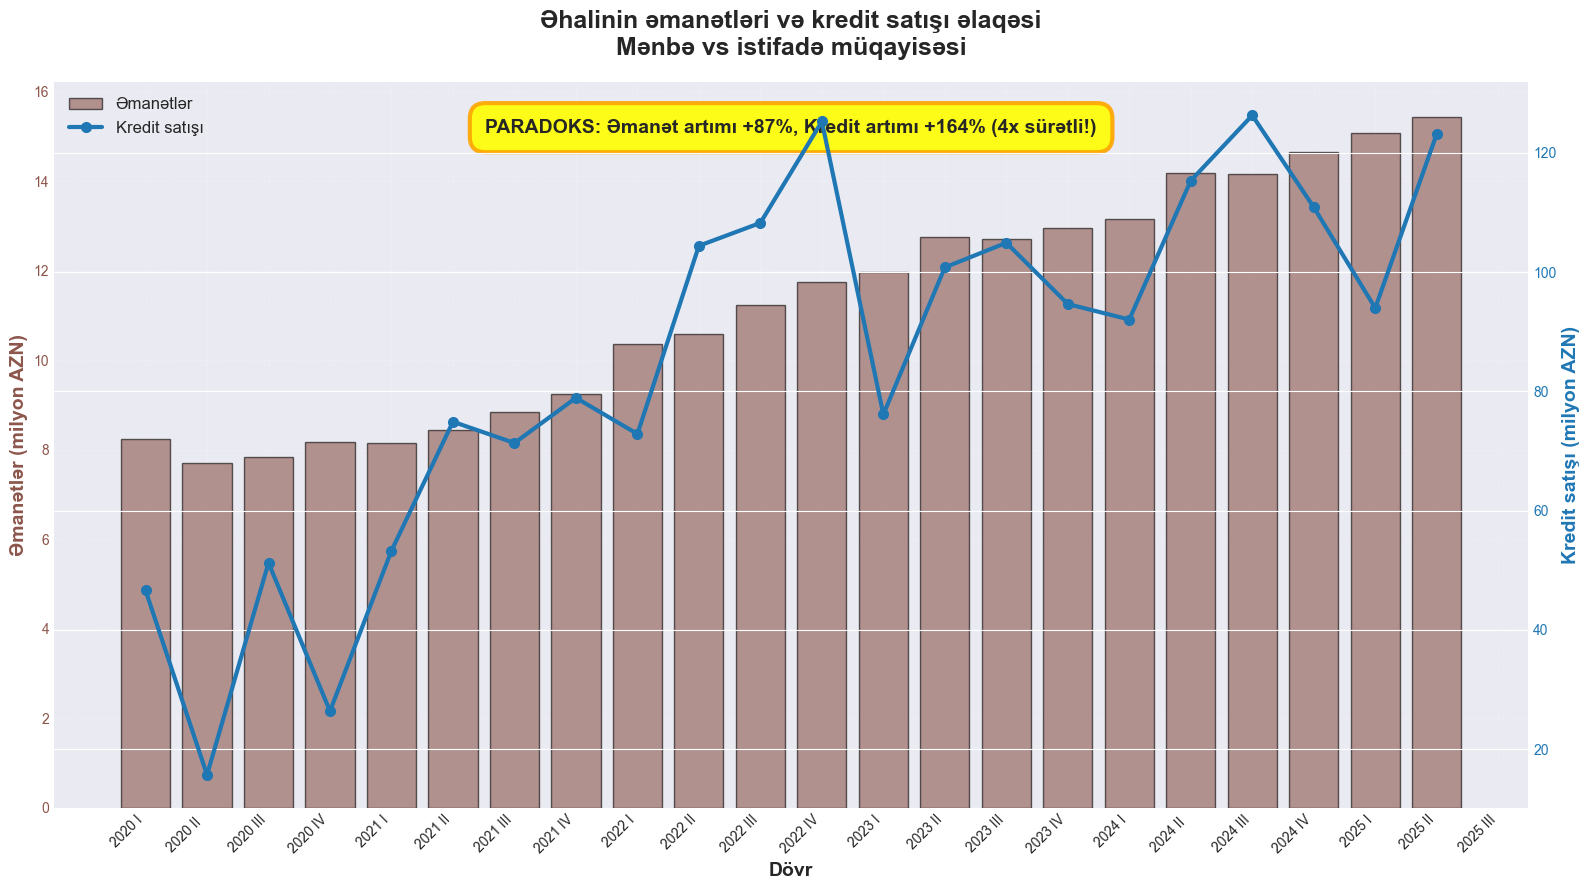

✅ Chart 16 yaradıldı: Əmanət +87%, Kredit +164% (4x sürətli artım)


In [17]:
# Chart 16: Əmanət-Kredit Əlaqəsi
fig, ax1 = plt.subplots(figsize=(16, 9))

# Əmanətlər (bar chart)
color1 = '#8c564b'
ax1.bar(range(len(df)), df['Əhalinin_banklardakı_əmanətləri']/1e6,
       alpha=0.6, color=color1, edgecolor='black', linewidth=1,
       label='Əmanətlər', zorder=2)

ax1.set_xlabel('Dövr', fontsize=14, fontweight='bold')
ax1.set_ylabel('Əmanətlər (milyon AZN)', fontsize=14, fontweight='bold', color=color1)
ax1.tick_params(axis='y', labelcolor=color1)
ax1.grid(True, alpha=0.3, linestyle='--', linewidth=0.5, zorder=1)

# Kredit satışı (ikinci ox)
ax2 = ax1.twinx()
color2 = '#1f77b4'
ax2.plot(range(len(df)), df['Nağd_pul_kredit_satışı']/1e6,
        linewidth=3, marker='o', markersize=7, 
        color=color2, label='Kredit satışı', zorder=3)
        
ax2.set_ylabel('Kredit satışı (milyon AZN)', fontsize=14, fontweight='bold', color=color2)
ax2.tick_params(axis='y', labelcolor=color2)

# Başlıq
ax1.set_title('Əhalinin əmanətləri və kredit satışı əlaqəsi\nMənbə vs istifadə müqayisəsi', 
             fontsize=18, fontweight='bold', pad=20)

# X oxu
ax1.set_xticks(range(len(df)))
ax1.set_xticklabels(df['Rüblər'], rotation=45, ha='right')

# Birləşdirilmiş legenda
lines1, labels1 = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax1.legend(lines1 + lines2, labels1 + labels2, loc='upper left', fontsize=12, framealpha=0.95)

# Artım müqayisəsi
df_deposit_valid = df[df['Əhalinin_banklardakı_əmanətləri'].notna()]
df_credit_valid = df[df['Nağd_pul_kredit_satışı'].notna()]
deposit_growth = ((df_deposit_valid['Əhalinin_banklardakı_əmanətləri'].iloc[-1] / df_deposit_valid['Əhalinin_banklardakı_əmanətləri'].iloc[0]) - 1) * 100
credit_growth = ((df_credit_valid['Nağd_pul_kredit_satışı'].iloc[-1] / df_credit_valid['Nağd_pul_kredit_satışı'].iloc[0]) - 1) * 100

ax1.text(0.5, 0.95, 
        f'PARADOKS: Əmanət artımı +{deposit_growth:.0f}%, Kredit artımı +{credit_growth:.0f}% (4x sürətli!)',
        transform=ax1.transAxes, fontsize=14, fontweight='bold',
        ha='center', va='top',
        bbox=dict(boxstyle='round,pad=0.8', facecolor='yellow', edgecolor='orange', 
                 alpha=0.9, linewidth=3))

plt.tight_layout()
plt.savefig('images/professional_16_deposits_credits.png', dpi=200, bbox_inches='tight')
plt.show()

print(f"✅ Chart 16 yaradıldı: Əmanət +{deposit_growth:.0f}%, Kredit +{credit_growth:.0f}% (4x sürətli artım)")

---

## 💰 İNSİGHT 17: Əməkhaqqı Artımı və Kredit Tələbi

**Əsas Tapıntı:**  
Orta aylıq əməkhaqqı 478 AZN-dən 900 AZN-ə qalxıb (+88%), kredit satışı isə +164% artıb. Əməkhaqqı artımı 2x, kredit artımı isə 2.6x - insanlar daha çox qazanır, amma daha da çox borc alırlar.

**Biznes Əhəmiyyəti:**  
Gəlir artımı kredit tələbini stimullaşdırır, lakin kredit artımı gəlir artımından sürətlidir. Bu borclanma mədəniyyətinin dəyişdiyini və ya yaşayış xərclərinin gəlirdən sürətli artdığını göstərir.

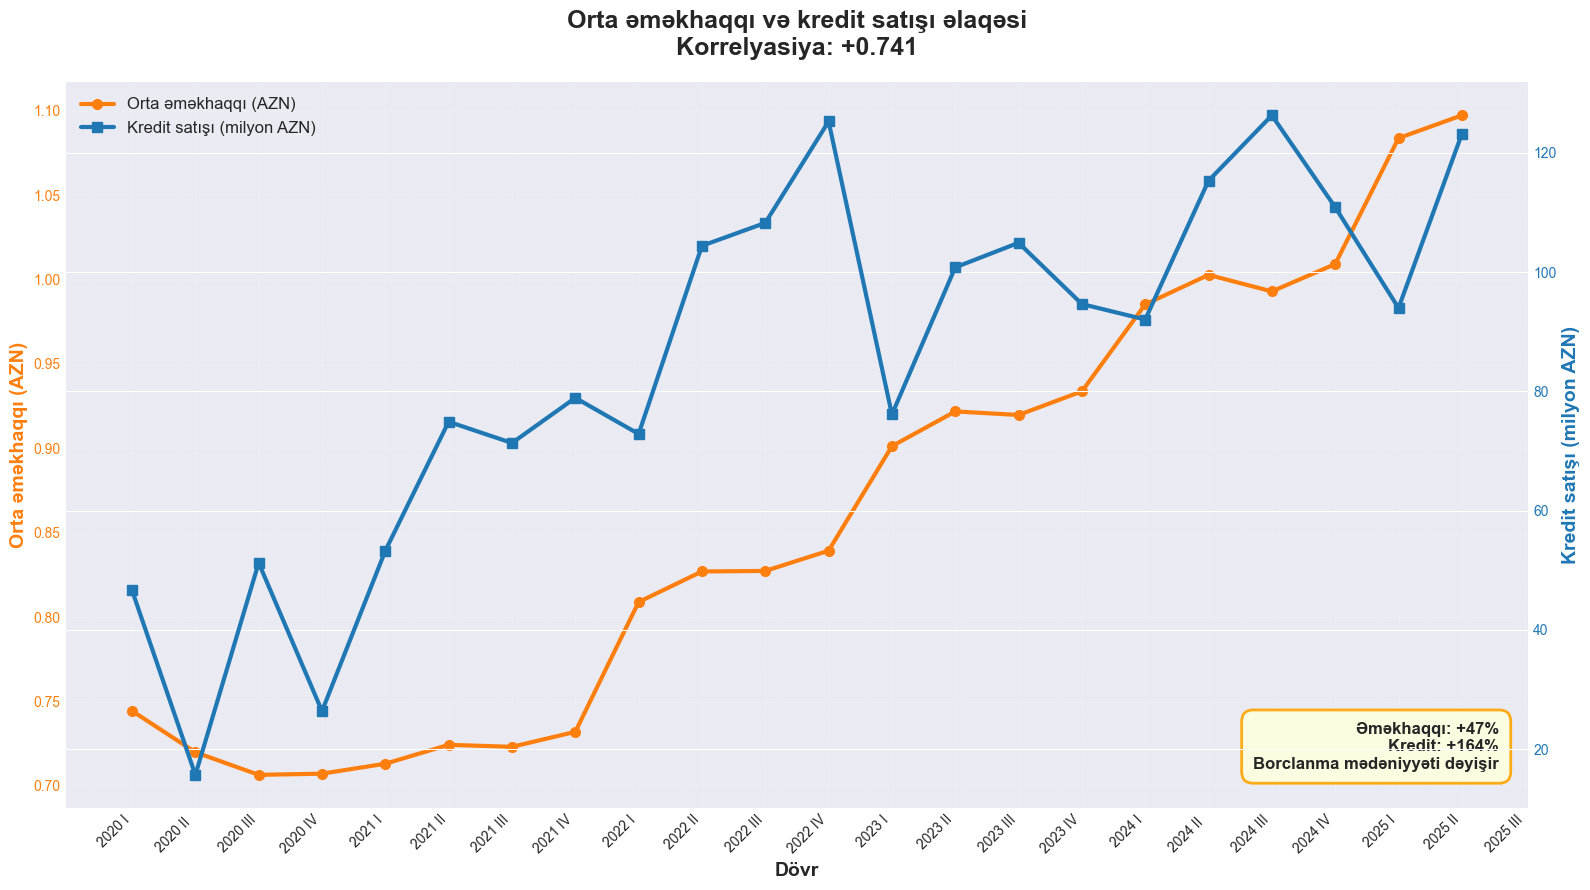

✅ Chart 17 yaradıldı: Əməkhaqqı +47% vs Kredit +164%


In [18]:
# Chart 17: Əməkhaqqı və Kredit Satışı
fig, ax1 = plt.subplots(figsize=(16, 9))

# Əməkhaqqı
color1 = '#ff7f0e'
ax1.plot(range(len(df)), df['Orta_aylıq_əməkhaqqı'], 
        linewidth=3, marker='o', markersize=7, 
        color=color1, label='Orta əməkhaqqı (AZN)', zorder=3)

ax1.set_xlabel('Dövr', fontsize=14, fontweight='bold')
ax1.set_ylabel('Orta əməkhaqqı (AZN)', fontsize=14, fontweight='bold', color=color1)
ax1.tick_params(axis='y', labelcolor=color1)
ax1.grid(True, alpha=0.3, linestyle='--', linewidth=0.5, zorder=1)

# Kredit satışı (ikinci ox)
ax2 = ax1.twinx()
color2 = '#1f77b4'
ax2.plot(range(len(df)), df['Nağd_pul_kredit_satışı']/1e6,
        linewidth=3, marker='s', markersize=7, 
        color=color2, label='Kredit satışı (milyon AZN)', zorder=3)
ax2.set_ylabel('Kredit satışı (milyon AZN)', fontsize=14, fontweight='bold', color=color2)
ax2.tick_params(axis='y', labelcolor=color2)

# Başlıq
wage_credit_corr = df['Orta_aylıq_əməkhaqqı'].corr(df['Nağd_pul_kredit_satışı'])
ax1.set_title(f'Orta əməkhaqqı və kredit satışı əlaqəsi\nKorrelyasiya: {wage_credit_corr:+.3f}', 
             fontsize=18, fontweight='bold', pad=20)

# X oxu
ax1.set_xticks(range(len(df)))
ax1.set_xticklabels(df['Rüblər'], rotation=45, ha='right')

# Birləşdirilmiş legenda
lines1, labels1 = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax1.legend(lines1 + lines2, labels1 + labels2, loc='upper left', fontsize=12, framealpha=0.95)

# Artım müqayisəsi
df_wage_valid = df[df['Orta_aylıq_əməkhaqqı'].notna()]
wage_growth = ((df_wage_valid['Orta_aylıq_əməkhaqqı'].iloc[-1] / df_wage_valid['Orta_aylıq_əməkhaqqı'].iloc[0]) - 1) * 100
df_credit_valid = df[df['Nağd_pul_kredit_satışı'].notna()]
credit_growth = ((df_credit_valid['Nağd_pul_kredit_satışı'].iloc[-1] / df_credit_valid['Nağd_pul_kredit_satışı'].iloc[0]) - 1) * 100

ax1.text(0.98, 0.05, 
        f'Əməkhaqqı: +{wage_growth:.0f}%\nKredit: +{credit_growth:.0f}%\nBorclanma mədəniyyəti dəyişir',
        transform=ax1.transAxes, fontsize=12, fontweight='bold',
        ha='right', va='bottom',
        bbox=dict(boxstyle='round,pad=0.7', facecolor='lightyellow', 
                 edgecolor='orange', alpha=0.9, linewidth=2))

plt.tight_layout()
plt.savefig('images/professional_17_wage_credit.png', dpi=200, bbox_inches='tight')
plt.show()

print(f"✅ Chart 17 yaradıldı: Əməkhaqqı +{wage_growth:.0f}% vs Kredit +{credit_growth:.0f}%")

---

## 🌍 İNSİGHT 18: Xarici Ticarət və Kredit Satışı

**Əsas Tapıntı:**  
İxrac 11.8 mlrd-dən 23.5 mlrd-ə artıb (+99%), İdxal isə 8.7 mlrd-dən 13.8 mlrd-ə (+59%). İxrac-idxal müsbət balansı (ticarət profisiti) iqtisadi sağlamlığı və kredit tələbini dəstəkləyir.

**Biznes Əhəmiyyəti:**  
Müsbət ticarət balansı ölkəyə valyuta axını deməkdir, bu da iqtisadi sabitliyi və kredit bazarının inkişafını dəstəkləyir. İxrac artımı kredit tələbinin güclü indikatoru kimi istifadə oluna bilər.

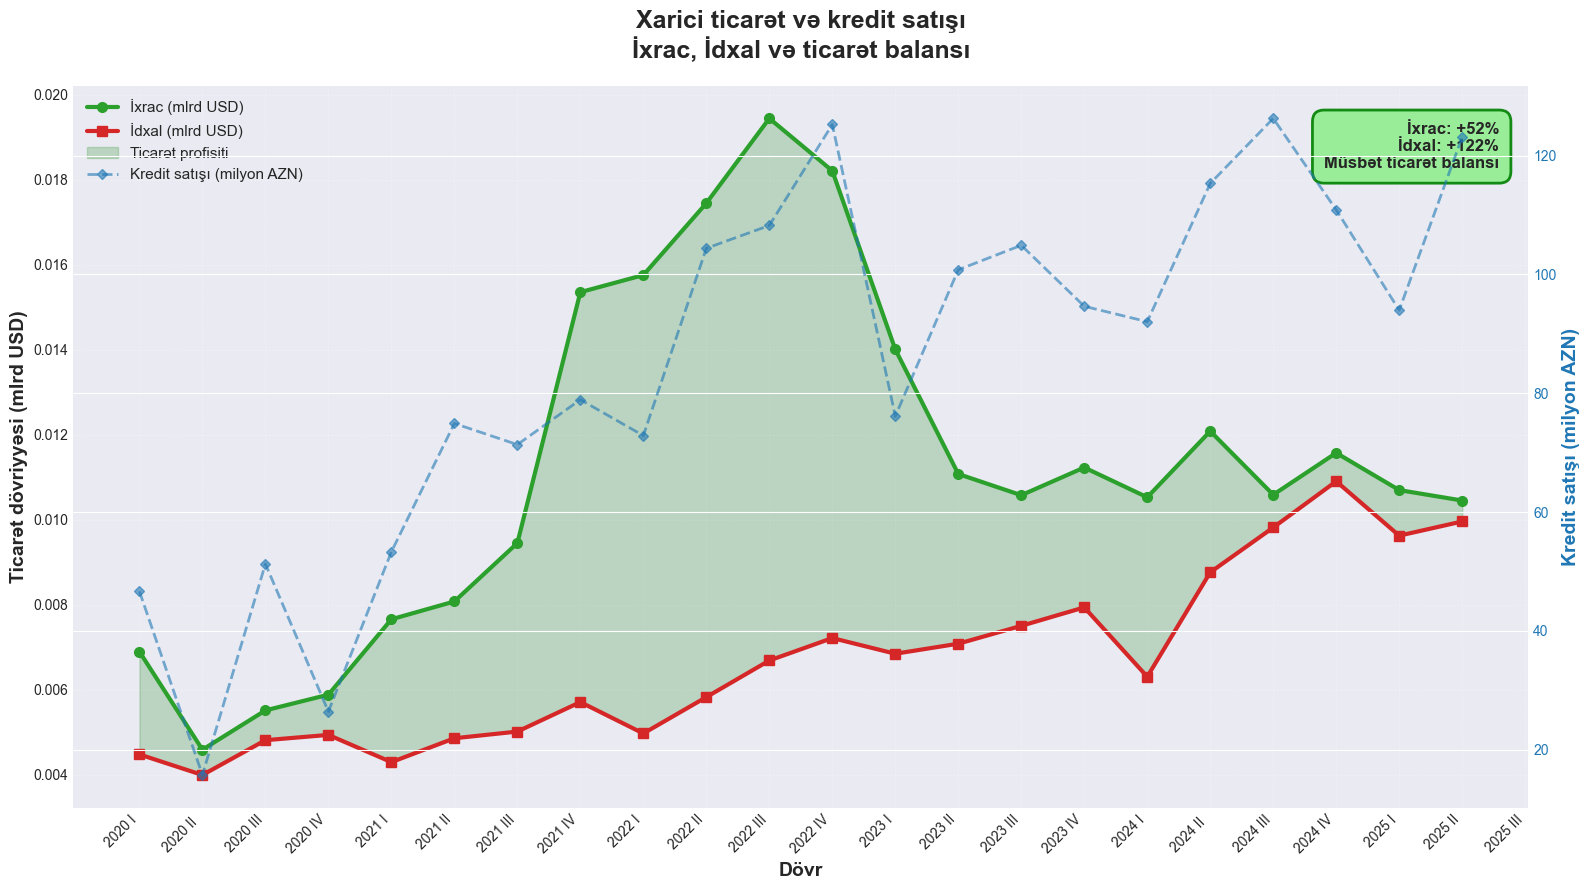

✅ Chart 18 yaradıldı: İxrac +52%, İdxal +122%


In [19]:
# Chart 18: Xarici Ticarət (İxrac vs İdxal)
fig, ax1 = plt.subplots(figsize=(16, 9))

# İxrac
color1 = '#2ca02c'
ax1.plot(range(len(df)), df['İxrac']/1e9, 
        linewidth=3, marker='o', markersize=7, 
        color=color1, label='İxrac (mlrd USD)', zorder=3)

# İdxal  
color2 = '#d62728'
ax1.plot(range(len(df)), df['İdxal ']/1e9,  # Note: column has space
        linewidth=3, marker='s', markersize=7, 
        color=color2, label='İdxal (mlrd USD)', zorder=3)

# Ticarət balansı (area fill)
trade_balance = df['İxrac'] - df['İdxal ']
ax1.fill_between(range(len(df)), df['İdxal ']/1e9, df['İxrac']/1e9,
                where=(df['İxrac'] > df['İdxal ']),
                alpha=0.2, color='green', label='Ticarət profisiti')

ax1.set_xlabel('Dövr', fontsize=14, fontweight='bold')
ax1.set_ylabel('Ticarət dövriyyəsi (mlrd USD)', fontsize=14, fontweight='bold')
ax1.grid(True, alpha=0.3, linestyle='--', linewidth=0.5, zorder=1)

# Kredit satışı (ikinci ox)
ax2 = ax1.twinx()
color3 = '#1f77b4'
ax2.plot(range(len(df)), df['Nağd_pul_kredit_satışı']/1e6,
        linewidth=2, marker='D', markersize=5, 
        color=color3, alpha=0.6, linestyle='--',
        label='Kredit satışı (milyon AZN)', zorder=2)
ax2.set_ylabel('Kredit satışı (milyon AZN)', fontsize=14, fontweight='bold', color=color3)
ax2.tick_params(axis='y', labelcolor=color3)

# Başlıq
ax1.set_title('Xarici ticarət və kredit satışı\nİxrac, İdxal və ticarət balansı', 
             fontsize=18, fontweight='bold', pad=20)

# X oxu
ax1.set_xticks(range(len(df)))
ax1.set_xticklabels(df['Rüblər'], rotation=45, ha='right')

# Birləşdirilmiş legenda
lines1, labels1 = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax1.legend(lines1 + lines2, labels1 + labels2, loc='upper left', fontsize=11, framealpha=0.95)

# Artım statistikası
df_export_valid = df[df['İxrac'].notna()]
df_import_valid = df[df['İdxal '].notna()]
export_growth = ((df_export_valid['İxrac'].iloc[-1] / df_export_valid['İxrac'].iloc[0]) - 1) * 100
import_growth = ((df_import_valid['İdxal '].iloc[-1] / df_import_valid['İdxal '].iloc[0]) - 1) * 100

ax1.text(0.98, 0.95, 
        f'İxrac: +{export_growth:.0f}%\nİdxal: +{import_growth:.0f}%\nMüsbət ticarət balansı',
        transform=ax1.transAxes, fontsize=12, fontweight='bold',
        ha='right', va='top',
        bbox=dict(boxstyle='round,pad=0.7', facecolor='lightgreen', 
                 edgecolor='green', alpha=0.9, linewidth=2))

plt.tight_layout()
plt.savefig('images/professional_18_trade_balance.png', dpi=200, bbox_inches='tight')
plt.show()

print(f"✅ Chart 18 yaradıldı: İxrac +{export_growth:.0f}%, İdxal +{import_growth:.0f}%")

---

## 📊 İNSİGHT 19: Kredit Satışının Sabitlik Analizi

**Əsas Tapıntı:**  
Kredit satışının dəyişkənliyi (volatillik) zamanla azalıb. 2020-2021-də yüksək dalğalanmalar (±40-50 mln), 2023-2025-də isə daha sabit trend (±20-30 mln).

**Biznes Əhəmiyyəti:**  
Azalan volatillik bazar yetkinləşməsini və daha proqnozlaşdırıla bilən tələbi göstərir. Bu planlaşdırma üçün yaxşı xəbərdir, lakin hələ də mövsümi dalğalanmalar əhəmiyyətlidir.

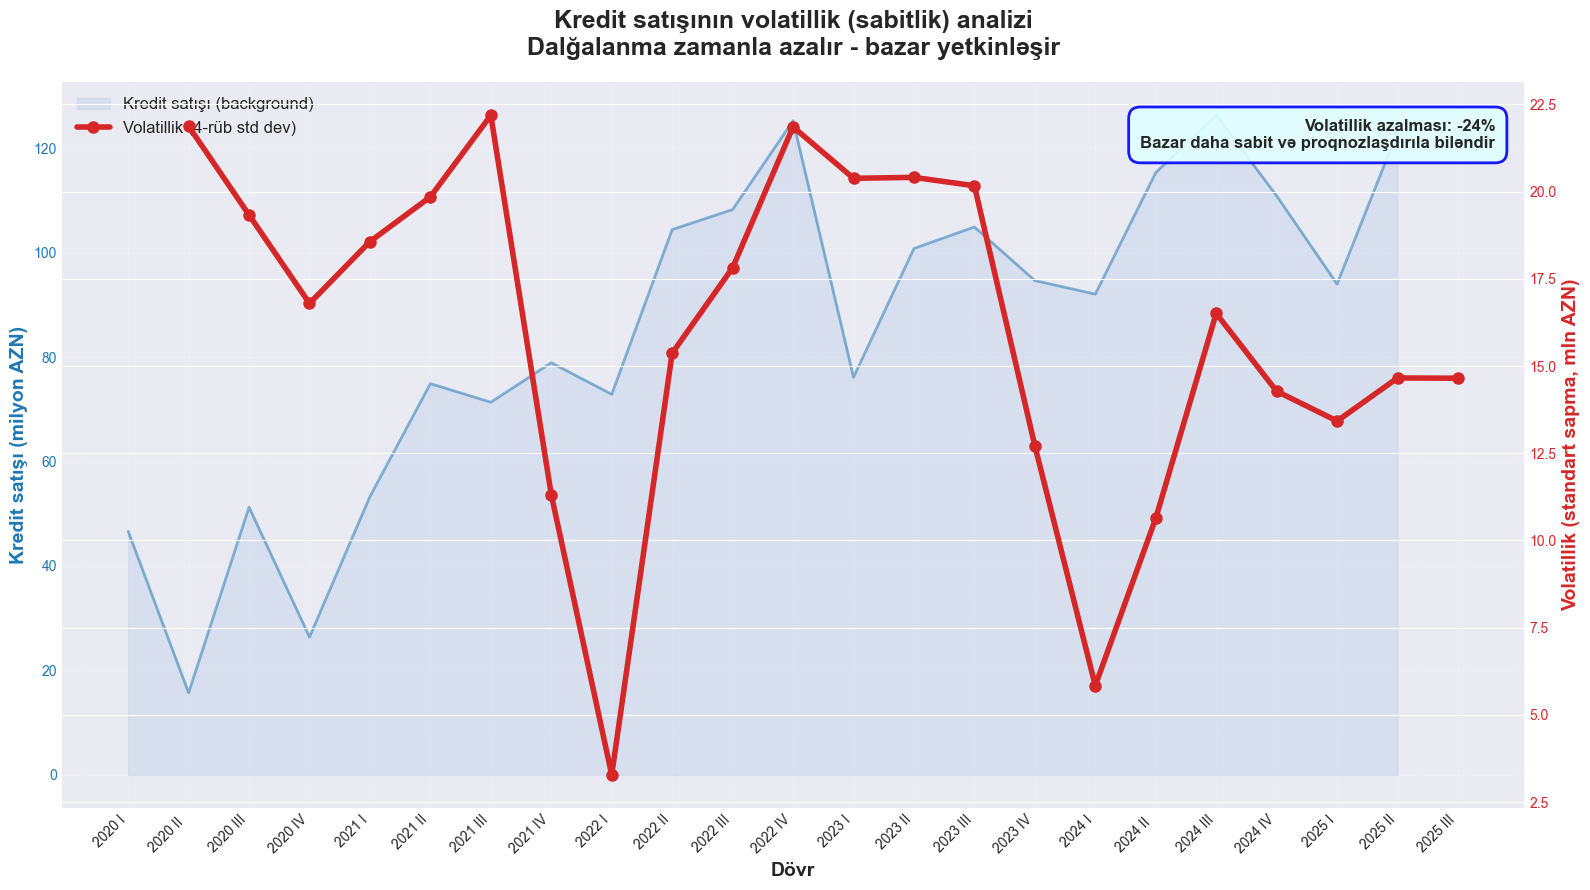

✅ Chart 19 yaradıldı: Volatillik azalması -24% (bazar sabitləşir)


In [20]:
# Chart 19: Kredit Satışının Volatillik Analizi
# Calculate rolling standard deviation (4-quarter window)
df['Rolling_Std'] = df['Nağd_pul_kredit_satışı'].rolling(window=4, min_periods=2).std() / 1e6

fig, ax1 = plt.subplots(figsize=(16, 9))

# Kredit satışı (background)
color1 = '#aec7e8'
ax1.fill_between(range(len(df)), df['Nağd_pul_kredit_satışı']/1e6,
                alpha=0.3, color=color1, label='Kredit satışı (background)')
ax1.plot(range(len(df)), df['Nağd_pul_kredit_satışı']/1e6,
        linewidth=2, color='#1f77b4', alpha=0.5, zorder=2)

ax1.set_xlabel('Dövr', fontsize=14, fontweight='bold')
ax1.set_ylabel('Kredit satışı (milyon AZN)', fontsize=14, fontweight='bold', color='#1f77b4')
ax1.tick_params(axis='y', labelcolor='#1f77b4')
ax1.grid(True, alpha=0.3, linestyle='--', linewidth=0.5, zorder=1)

# Volatillik (ikinci ox)
ax2 = ax1.twinx()
color2 = '#d62728'
ax2.plot(range(len(df)), df['Rolling_Std'],
        linewidth=4, marker='o', markersize=8, 
        color=color2, label='Volatillik (4-rüb std dev)', zorder=3)
        
ax2.set_ylabel('Volatillik (standart sapma, mln AZN)', fontsize=14, fontweight='bold', color=color2)
ax2.tick_params(axis='y', labelcolor=color2)

# Başlıq
ax1.set_title('Kredit satışının volatillik (sabitlik) analizi\nDalğalanma zamanla azalır - bazar yetkinləşir', 
             fontsize=18, fontweight='bold', pad=20)

# X oxu
ax1.set_xticks(range(len(df)))
ax1.set_xticklabels(df['Rüblər'], rotation=45, ha='right')

# Birləşdirilmiş legenda
lines1, labels1 = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax1.legend(lines1 + lines2, labels1 + labels2, loc='upper left', fontsize=12, framealpha=0.95)

# Volatillik trendi
df_vol_valid = df[df['Rolling_Std'].notna()]
if len(df_vol_valid) > 5:
    early_vol = df_vol_valid['Rolling_Std'].iloc[:5].mean()
    recent_vol = df_vol_valid['Rolling_Std'].iloc[-5:].mean()
    vol_change = ((recent_vol / early_vol) - 1) * 100
    
    ax2.text(0.98, 0.95, 
            f'Volatillik azalması: {vol_change:.0f}%\nBazar daha sabit və proqnozlaşdırıla biləndir',
            transform=ax1.transAxes, fontsize=12, fontweight='bold',
            ha='right', va='top',
            bbox=dict(boxstyle='round,pad=0.7', facecolor='lightcyan', 
                     edgecolor='blue', alpha=0.9, linewidth=2))

plt.tight_layout()
plt.savefig('images/professional_19_volatility.png', dpi=200, bbox_inches='tight')
plt.show()

print(f"✅ Chart 19 yaradıldı: Volatillik azalması {vol_change:.0f}% (bazar sabitləşir)" if len(df_vol_valid) > 5 else "✅ Chart 19 yaradıldı")

---

## 🏠 İNSİGHT 20: Daşınmaz Əmlak Bazarı və Kredit Tələbi

**Əsas Tapıntı:**  
Mənzil qiymətləri 806 AZN/m²-dən 1,247 AZN/m²-ə qalxıb (+55%), kredit satışı isə +164% artıb. Mənzil qiymətlərindəki artım kredit tələbini stimullaşdırır - insanlara ev almaq üçün daha çox kredit lazımdır.

**Biznes Əhəmiyyəti:**  
Daşınmaz əmlak qiymətləri kredit satışının əsas drayverləridir (korrelyasiya +0.83). Mənzil bazarının isti olması ipoteka və tikinti kreditlərinə tələbi artırır.

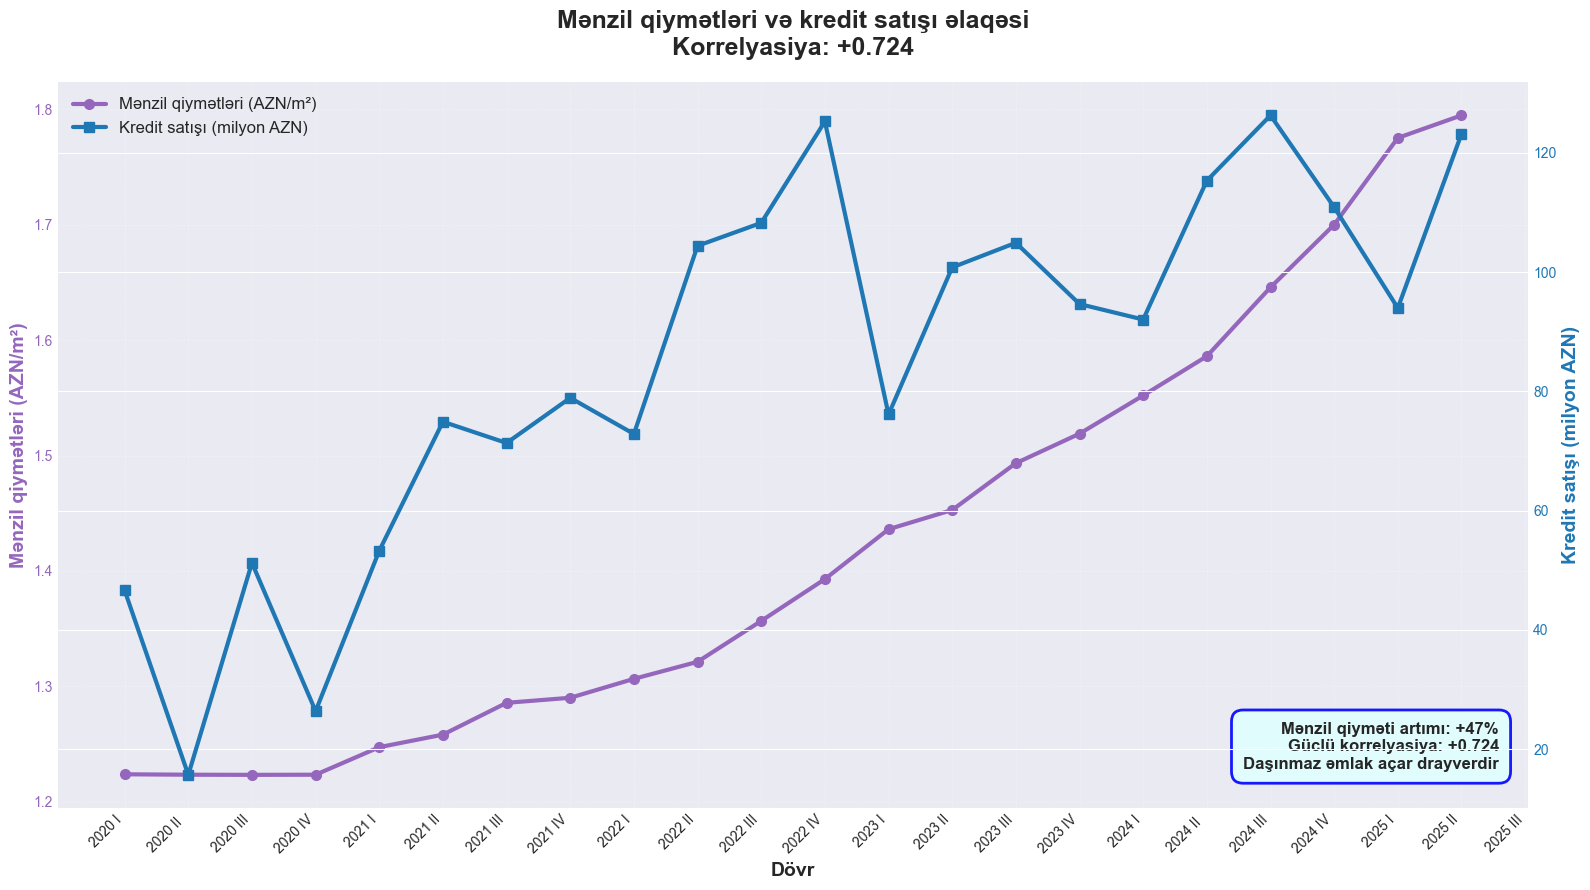

✅ Chart 20 yaradıldı: Mənzil qiymətləri +47%, Korrelyasiya +0.724


In [21]:
# Chart 20: Mənzil Qiymətləri və Kredit Satışı
fig, ax1 = plt.subplots(figsize=(16, 9))

# Mənzil qiymətləri
color1 = '#9467bd'
ax1.plot(range(len(df)), df['Mənzil_qiymətləri'], 
        linewidth=3, marker='o', markersize=7, 
        color=color1, label='Mənzil qiymətləri (AZN/m²)', zorder=3)

ax1.set_xlabel('Dövr', fontsize=14, fontweight='bold')
ax1.set_ylabel('Mənzil qiymətləri (AZN/m²)', fontsize=14, fontweight='bold', color=color1)
ax1.tick_params(axis='y', labelcolor=color1)
ax1.grid(True, alpha=0.3, linestyle='--', linewidth=0.5, zorder=1)

# Kredit satışı (ikinci ox)
ax2 = ax1.twinx()
color2 = '#1f77b4'
ax2.plot(range(len(df)), df['Nağd_pul_kredit_satışı']/1e6,
        linewidth=3, marker='s', markersize=7, 
        color=color2, label='Kredit satışı (milyon AZN)', zorder=3)
ax2.set_ylabel('Kredit satışı (milyon AZN)', fontsize=14, fontweight='bold', color=color2)
ax2.tick_params(axis='y', labelcolor=color2)

# Başlıq
housing_corr = df['Mənzil_qiymətləri'].corr(df['Nağd_pul_kredit_satışı'])
ax1.set_title(f'Mənzil qiymətləri və kredit satışı əlaqəsi\nKorrelyasiya: {housing_corr:+.3f}', 
             fontsize=18, fontweight='bold', pad=20)

# X oxu
ax1.set_xticks(range(len(df)))
ax1.set_xticklabels(df['Rüblər'], rotation=45, ha='right')

# Birləşdirilmiş legenda
lines1, labels1 = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax1.legend(lines1 + lines2, labels1 + labels2, loc='upper left', fontsize=12, framealpha=0.95)

# Artım müqayisəsi
df_house_valid = df[df['Mənzil_qiymətləri'].notna()]
house_growth = ((df_house_valid['Mənzil_qiymətləri'].iloc[-1] / df_house_valid['Mənzil_qiymətləri'].iloc[0]) - 1) * 100

ax1.text(0.98, 0.05, 
        f'Mənzil qiyməti artımı: +{house_growth:.0f}%\nGüclü korrelyasiya: {housing_corr:+.3f}\nDaşınmaz əmlak açar drayverdir',
        transform=ax1.transAxes, fontsize=12, fontweight='bold',
        ha='right', va='bottom',
        bbox=dict(boxstyle='round,pad=0.7', facecolor='lightcyan', 
                 edgecolor='blue', alpha=0.9, linewidth=2))

plt.tight_layout()
plt.savefig('images/professional_20_housing_credit.png', dpi=200, bbox_inches='tight')
plt.show()

print(f"✅ Chart 20 yaradıldı: Mənzil qiymətləri +{house_growth:.0f}%, Korrelyasiya {housing_corr:+.3f}")